 # Lista 03 - An√°lise de Dados
        
> Yanna Torres Gon√ßalves
>
> Mestrado em Ci√™ncias da Computa√ß√£o
>
> Matr√≠cula: 587299

In [1]:
!pip install plotnine statsmodels wordcloud networkx pyvis duckdb seaborn scikit-learn nltk

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 89.9/89.9 kB 4.0 MB/s eta 0:00:00
  Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 24.1 MB/s eta 0:00:00:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547.9/547.9 kB 18.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 756.0/756.0 kB 20.3 MB/s eta 0:00:0000:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21.1/21.1 MB 27.5 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
import pandas as pd
import numpy as np
import re
import duckdb
import math
import matplotlib.pyplot as plt
from plotnine import *
import scipy
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx
from pyvis.network import Network
from collections import Counter
from itertools import combinations
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## a) Ler o dataset fakeTelegram.BR_2022.csv

Utilizamos o mesmo dataset da lista 01, acessando pelo mesmo link.

[https://github.com/yanna-torres/CKP9011-ciencia-de-dados/blob/lista-01/data/fakeTelegram.BR_2022.csv](https://github.com/yanna-torres/CKP9011-ciencia-de-dados/blob/lista-01/data/fakeTelegram.BR_2022.csv)

In [3]:
data_url = "https://media.githubusercontent.com/media/yanna-torres/CKP9011-ciencia-de-dados/refs/heads/lista-01/data/fakeTelegram.BR_2022.csv"

df = pd.read_csv(data_url)

In [4]:
df.describe()

dataset_info_id  score_sentiment  score_misinformation    id_message
count         557586.0    444157.000000         167238.000000  5.575860e+05
mean               5.0         0.017330              0.312245  4.450617e+05
std                0.0         0.464165              0.293699  4.860211e+05
min                5.0        -1.000000              0.000003  2.000000e+00
25%                5.0        -0.177900              0.078454  2.127500e+04
50%                5.0         0.000000              0.197577  1.210935e+05
75%                5.0         0.318200              0.490351  9.726045e+05
max                5.0         0.999200              1.000000  1.516436e+06

## b) Remova os trava-zaps

Utilizamos a mesma fun√ß√£o da lista 01 criada para validar os dados da coluna `trava_zap`. Ap√≥s atualizar a coluna, criamos um novo dataframe com os dados sem trava-zaps.

In [5]:
def has_trava_zap(message):
    if not isinstance(message, str):
        return False  # Garante que s√≥ analisa strings

    # Regra 1: muito longo
    if len(message) > 10000:
        return True

    # Regra 2: caracteres invis√≠veis
    invisible = ''.join(chr(c) for c in range(0x200B, 0x200F + 1)) + '\uFEFF'
    if sum(message.count(c) for c in invisible) > 100:
        return True

    # Regra 3: emojis repetidos
    emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF"
                              "\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+", flags=re.UNICODE)
    emojis = emoji_pattern.findall(message)
    if any(len(e) > 20 for e in emojis):
        return True

    # Regra 4: baixa diversidade
    unique = set(message)
    if len(unique) < 10 and len(message) > 500:
        return True

    return False

In [6]:
df['trava_zap'] = df['text_content_anonymous'].apply(has_trava_zap)

In [7]:
df_clean = df[df['trava_zap'] == False]

In [8]:
df_clean.drop(columns=['trava_zap'], inplace=True)

/tmp/ipykernel_170/1420576694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
df_clean.describe()

dataset_info_id  score_sentiment  score_misinformation    id_message
count         556305.0    442876.000000         166416.000000  5.563050e+05
mean               5.0         0.017676              0.311496  4.448514e+05
std                0.0         0.463547              0.293146  4.859544e+05
min                5.0        -1.000000              0.000003  2.000000e+00
25%                5.0        -0.177900              0.078334  2.125100e+04
50%                5.0         0.000000              0.196892  1.208690e+05
75%                5.0         0.318200              0.488192  9.724220e+05
max                5.0         0.999200              1.000000  1.516436e+06

## c) Remover as linhas repetidas

In [10]:
df_clean = df_clean.drop_duplicates()

In [11]:
df_clean.describe()

dataset_info_id  score_sentiment  score_misinformation    id_message
count         556305.0    442876.000000         166416.000000  5.563050e+05
mean               5.0         0.017676              0.311496  4.448514e+05
std                0.0         0.463547              0.293146  4.859544e+05
min                5.0        -1.000000              0.000003  2.000000e+00
25%                5.0        -0.177900              0.078334  2.125100e+04
50%                5.0         0.000000              0.196892  1.208690e+05
75%                5.0         0.318200              0.488192  9.724220e+05
max                5.0         0.999200              1.000000  1.516436e+06

## d) Remover textos com menos de 5 palavras

In [12]:
df_clean = df_clean[df_clean['text_content_anonymous'].str.split().str.len() >= 5]

In [13]:
df.describe()

dataset_info_id  score_sentiment  score_misinformation    id_message
count         557586.0    444157.000000         167238.000000  5.575860e+05
mean               5.0         0.017330              0.312245  4.450617e+05
std                0.0         0.464165              0.293699  4.860211e+05
min                5.0        -1.000000              0.000003  2.000000e+00
25%                5.0        -0.177900              0.078454  2.127500e+04
50%                5.0         0.000000              0.197577  1.210935e+05
75%                5.0         0.318200              0.490351  9.726045e+05
max                5.0         0.999200              1.000000  1.516436e+06

---

## Pr√©-processamento com Colunas Auxiliares e DuckDB

Para facilitar a recupera√ß√£o de dados em alguns casos, vamos criar colunas auxiliares e tamb√©m vamos utilizar o duckdb.

In [14]:
stop_words = set(stopwords.words('portuguese', 'english'))

def clean_text(text):
    if not isinstance(text, str):
        return ''
    text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text_no_punct)
    filtered = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered)

df_clean['text_no_stopwords'] = df_clean['text_content_anonymous'].apply(clean_text)

In [15]:
df_clean['word_count'] = df_clean['text_content_anonymous'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

In [16]:
text_counts = df_clean['text_content_anonymous'].value_counts()
df_clean['viral'] = df_clean['text_content_anonymous'].apply(lambda x: True if pd.notnull(x) and text_counts[x] > 1 else False)

In [17]:
def classify_misinformation(score):
    if score >= 0.66:
        return 'Misinformation'
    elif score >= 0.33:
        return 'Neutral'
    else:
        return 'Non-misinformation'

# Criar coluna de categoria
df_clean['misinformation_category'] = df_clean['score_misinformation'].apply(classify_misinformation)

In [18]:
df_clean['sentiment'] = df_clean['score_sentiment'].apply(lambda x: "Positive" if x >= 0.05 else ("Negative" if x <= -0.05 else "Neutral"))

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338045 entries, 0 to 557585
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_message             338045 non-null  object 
 1   id_member_anonymous      142383 non-null  object 
 2   id_group_anonymous       338045 non-null  object 
 3   media                    126125 non-null  object 
 4   media_type               126125 non-null  object 
 5   media_url                82697 non-null   object 
 6   has_media                338045 non-null  bool   
 7   has_media_url            338045 non-null  bool   
 8   text_content_anonymous   338045 non-null  object 
 9   dataset_info_id          338045 non-null  int64  
 10  date_system              338045 non-null  object 
 11  score_sentiment          337998 non-null  float64
 12  score_misinformation     166402 non-null  float64
 13  id_message               338045 non-null  int64  
 14  message_t

In [20]:
conn = duckdb.connect()

conn.execute("CREATE TABLE messages AS SELECT * FROM df_clean")

In [21]:
numeric_columns = [
    "score_sentiment",
    "score_misinformation"
    "word_count"
]

In [80]:
category_columns = [
    "media_type",
    "has_media",
    "message_type",
    "messenger",
    "viral",
    "misinformation_category",
    "sentiment"
]

## e) Para cada atributo num√©rico apresente

### 1. Medidas de Tend√™ncia Central

*   M√©dia Aritm√©tica
*   Mediana
*   Valor m√°ximo e m√≠nimo

In [23]:
numeric_stats_params = {
    'score_sentiment': {
        'mean': df_clean['score_sentiment'].mean(),
        'median': df_clean['score_sentiment'].median(),
        'max': df_clean['score_sentiment'].max(),
        'min': df_clean['score_sentiment'].min()
    },
    'score_misinformation': {
        'mean': df_clean['score_misinformation'].mean(),
        'median': df_clean['score_misinformation'].median(),
        'max': df_clean['score_misinformation'].max(),
        'min': df_clean['score_misinformation'].min()
    },
    'word_count': {
        'mean': df_clean['word_count'].mean(),
        'median': df_clean['word_count'].median(),
        'max': df_clean['word_count'].max(),
        'min': df_clean['word_count'].min()
    }
}

numeric_stats_params_df = pd.DataFrame(numeric_stats_params)
numeric_stats_params_df

score_sentiment  score_misinformation  word_count
mean           0.022497              0.311514   41.811809
median         0.000000              0.196925   20.000000
max            0.999200              1.000000  994.000000
min           -1.000000              0.000003    5.000000

### 2. Medidas de Variabilidade

*   Desvio em rela√ß√£o √† m√©dia
*   Vari√¢ncia
*   Desvio Padr√£o

In [24]:
score_sentiment_mean_deviation = (df_clean['score_sentiment'] - df_clean['score_sentiment'].mean()).abs().mean()
score_sentiment_variance = df_clean['score_sentiment'].var()
score_sentiment_std = df_clean['score_sentiment'].std()

score_misinformation_mean_deviation = (df_clean['score_misinformation'] - df_clean['score_misinformation'].mean()).abs().mean()
score_misinformation_variance = df_clean['score_misinformation'].var()
score_misinformation_std = df_clean['score_misinformation'].std()

word_count_mean_deviation = (df_clean['word_count'] - df_clean['word_count'].mean()).abs().mean()
word_count_variance = df_clean['word_count'].var()
word_count_std = df_clean['word_count'].std()

In [25]:
numeric_stats_variablity_params = {
    'score_sentiment': {
        'mean_deviation': score_sentiment_mean_deviation,
        'variance': score_sentiment_variance,
        'std': score_sentiment_std
    },
    'score_misinformation': {
        'mean_deviation': score_misinformation_mean_deviation,
        'variance': score_misinformation_variance,
        'std': score_misinformation_std
    },
    'word_count': {
        'mean_deviation': word_count_mean_deviation,
        'variance': word_count_variance,
        'std': word_count_std
    }
}

numeric_stats_variablity_params_df = pd.DataFrame(numeric_stats_variablity_params)
numeric_stats_variablity_params_df

score_sentiment  score_misinformation   word_count
mean_deviation         0.425371              0.243704    35.530442
variance               0.280067              0.085937  5412.600883
std                    0.529214              0.293150    73.570380

### 3. Tabela de Frequ√™ncia e Histograma

#### Score Sentiment

In [26]:
# 1. N√∫mero de classes (k) - Regra de Sturges
n_ss = len(df_clean)
k_ss = math.ceil(1 + 3.3 * math.log10(n_ss))

# 2. Intervalo da vari√°vel
min_val_ss = df_clean['score_sentiment'].min()
max_val_ss = df_clean['score_sentiment'].max()

# 3. Amplitude dos intervalos
amplitude_ss = (max_val_ss - min_val_ss) / k_ss

# 4. Criar os intervalos de classe
bins_ss = [min_val_ss + i * amplitude_ss for i in range(k_ss+1)]
labels_ss = [f"[{round(bins_ss[i], 2)}, {round(bins_ss[i+1], 2)})" for i in range(k_ss)]

# 5. Classificar os dados
df_clean['classe_ss'] = pd.cut(df_clean['score_sentiment'], bins=bins_ss, labels=labels_ss, include_lowest=True, right=False)

# 6. Frequ√™ncias
frequencia_abs_ss = df_clean['classe_ss'].value_counts().reindex(labels_ss, fill_value=0)
frequencia_rel_ss = (frequencia_abs_ss / n_ss).round(4)
frequencia_per_ss = (frequencia_rel_ss * 100).round(2)
frequencia_acum_per_ss = frequencia_per_ss.cumsum()
densidade_ss = (frequencia_rel_ss / amplitude_ss).round(4)
# Calcular pontos m√©dios de cada classe
pontos_medios_ss = [round((bins_ss[i] + bins_ss[i+1]) / 2, 4) for i in range(k_ss)]


# 7. Tabela final
tabela_frequencia_ss = pd.DataFrame({
    'Classe': labels_ss,
    'Frequ√™ncia Absoluta': frequencia_abs_ss.values,
    'Frequ√™ncia Relativa': frequencia_rel_ss.values,
    'Frequ√™ncia Percentual': frequencia_per_ss.values,
    'Frequ√™ncia Acumulada (%)': frequencia_acum_per_ss.values,
    'Densidade': densidade_ss.values,
    'Ponto M√©dio': pontos_medios_ss,
})


# 8. Exibir
print("Tabela de Frequ√™ncia: Score Sentiment")
tabela_frequencia_ss

Tabela de Frequ√™ncia: Score Sentiment


Classe  Frequ√™ncia Absoluta  Frequ√™ncia Relativa  \
0   [-1.0, -0.9)                12751               0.0377   
1   [-0.9, -0.8)                12620               0.0373   
2   [-0.8, -0.7)                13896               0.0411   
3   [-0.7, -0.6)                14008               0.0414   
4   [-0.6, -0.5)                14658               0.0434   
5   [-0.5, -0.4)                15661               0.0463   
6   [-0.4, -0.3)                10108               0.0299   
7   [-0.3, -0.2)                14998               0.0444   
8   [-0.2, -0.1)                14222               0.0421   
9   [-0.1, -0.0)                 4209               0.0125   
10   [-0.0, 0.1)                82453               0.2439   
11    [0.1, 0.2)                 7061               0.0209   
12    [0.2, 0.3)                10891               0.0322   
13    [0.3, 0.4)                12039               0.0356   
14    [0.4, 0.5)                13450               0.0398   
15    [0.5, 0.6)                29274               0.0866   
16    [0.6, 0.7)                10056               0.0297   
17    [0.7, 0.8)                16833               0.0498   
18    [0.8, 0.9)                13738               0.0406   
19    [0.9, 1.0)                15072               0.0446   

    Frequ√™ncia Percentual  Frequ√™ncia Acumulada (%)  Densidade  Ponto M√©dio  
0                    3.77                      3.77     0.3772      -0.9500  
1                    3.73                      7.50     0.3731      -0.8501  
2                    4.11                     11.61     0.4112      -0.7501  
3                    4.14                     15.75     0.4142      -0.6501  
4                    4.34                     20.09     0.4342      -0.5502  
5                    4.63                     24.72     0.4632      -0.4502  
6                    2.99                     27.71     0.2991      -0.3503  
7                    4.44                     32.15     0.4442      -0.2503  
8                    4.21                     36.36     0.4212      -0.1503  
9                    1.25                     37.61     0.1251      -0.0504  
10                  24.39                     62.00     2.4400       0.0496  
11                   2.09                     64.09     0.2091       0.1495  
12                   3.22                     67.31     0.3221       0.2495  
13                   3.56                     70.87     0.3561       0.3495  
14                   3.98                     74.85     0.3982       0.4494  
15                   8.66                     83.51     0.8663       0.5494  
16                   2.97                     86.48     0.2971       0.6493  
17                   4.98                     91.46     0.4982       0.7493  
18                   4.06                     95.52     0.4062       0.8493  
19                   4.46                     99.98     0.4462       0.9492

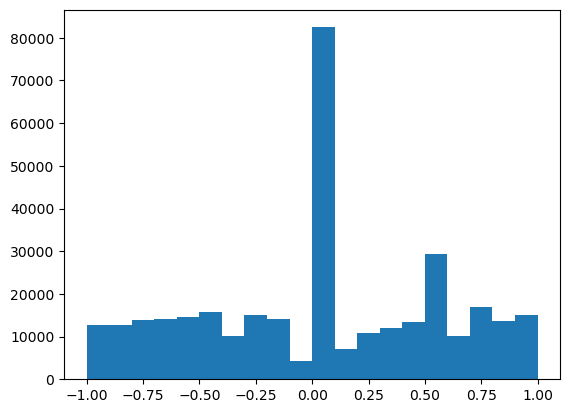

In [27]:
plt.hist(df_clean['score_sentiment'], bins=k_ss)
plt.show()

#### Score Misinformation

In [29]:
# 1. N√∫mero de classes (k) - Regra de Sturges
n_sm = len(df_clean)
k_sm = math.ceil(1 + 3.3 * math.log10(n_sm))

# 2. Intervalo da vari√°vel
min_val_sm = df_clean['score_misinformation'].min()
max_val_sm = df_clean['score_misinformation'].max()

# 3. Amplitude dos intervalos
amplitude_sm = (max_val_sm - min_val_sm) / k_sm

# 4. Criar os intervalos de classe
bins_sm = [min_val_sm + i * amplitude_sm for i in range(k_sm+1)]
labels_sm = [f"[{round(bins_sm[i], 2)}, {round(bins_sm[i+1], 2)})" for i in range(k_sm)]

# 5. Classificar os dados
df_clean['classe_sm'] = pd.cut(df_clean['score_misinformation'], bins=bins_sm, labels=labels_sm, include_lowest=True, right=False)

# 6. Frequ√™ncias
frequencia_abs_sm = df_clean['classe_sm'].value_counts().reindex(labels_sm, fill_value=0)
frequencia_rel_sm = (frequencia_abs_sm / n_sm).round(4)
frequencia_per_sm = (frequencia_rel_sm * 100).round(2)
frequencia_acum_per_sm = frequencia_per_sm.cumsum()
densidade_sm = (frequencia_rel_sm / amplitude_sm).round(4)
# Calcular pontos m√©dios de cada classe
pontos_medios_sm = [round((bins_sm[i] + bins_sm[i+1]) / 2, 4) for i in range(k_sm)]


# 7. Tabela final
tabela_frequencia_sm = pd.DataFrame({
    'Classe': labels_sm,
    'Frequ√™ncia Absoluta': frequencia_abs_sm.values,
    'Frequ√™ncia Relativa': frequencia_rel_sm.values,
    'Frequ√™ncia Percentual': frequencia_per_sm.values,
    'Frequ√™ncia Acumulada (%)': frequencia_acum_per_sm.values,
    'Densidade': densidade_sm.values,
    'Ponto M√©dio': pontos_medios_sm,
})


# 8. Exibir
print("Tabela de Frequ√™ncia: Score Misinformation")
tabela_frequencia_sm

Tabela de Frequ√™ncia: Score Misinformation


Classe  Frequ√™ncia Absoluta  Frequ√™ncia Relativa  \
0   [0.0, 0.05)                27892               0.0825   
1   [0.05, 0.1)                23074               0.0683   
2   [0.1, 0.15)                18951               0.0561   
3   [0.15, 0.2)                14012               0.0415   
4   [0.2, 0.25)                11003               0.0325   
5   [0.25, 0.3)                 8088               0.0239   
6   [0.3, 0.35)                 6850               0.0203   
7   [0.35, 0.4)                 5942               0.0176   
8   [0.4, 0.45)                 5376               0.0159   
9   [0.45, 0.5)                 4663               0.0138   
10  [0.5, 0.55)                 4259               0.0126   
11  [0.55, 0.6)                 4184               0.0124   
12  [0.6, 0.65)                 3701               0.0109   
13  [0.65, 0.7)                 3925               0.0116   
14  [0.7, 0.75)                 3281               0.0097   
15  [0.75, 0.8)                 3478               0.0103   
16  [0.8, 0.85)                 3263               0.0097   
17  [0.85, 0.9)                 3047               0.0090   
18  [0.9, 0.95)                 3552               0.0105   
19  [0.95, 1.0)                 7859               0.0232   

    Frequ√™ncia Percentual  Frequ√™ncia Acumulada (%)  Densidade  Ponto M√©dio  
0                    8.25                      8.25      1.650        0.025  
1                    6.83                     15.08      1.366        0.075  
2                    5.61                     20.69      1.122        0.125  
3                    4.15                     24.84      0.830        0.175  
4                    3.25                     28.09      0.650        0.225  
5                    2.39                     30.48      0.478        0.275  
6                    2.03                     32.51      0.406        0.325  
7                    1.76                     34.27      0.352        0.375  
8                    1.59                     35.86      0.318        0.425  
9                    1.38                     37.24      0.276        0.475  
10                   1.26                     38.50      0.252        0.525  
11                   1.24                     39.74      0.248        0.575  
12                   1.09                     40.83      0.218        0.625  
13                   1.16                     41.99      0.232        0.675  
14                   0.97                     42.96      0.194        0.725  
15                   1.03                     43.99      0.206        0.775  
16                   0.97                     44.96      0.194        0.825  
17                   0.90                     45.86      0.180        0.875  
18                   1.05                     46.91      0.210        0.925  
19                   2.32                     49.23      0.464        0.975

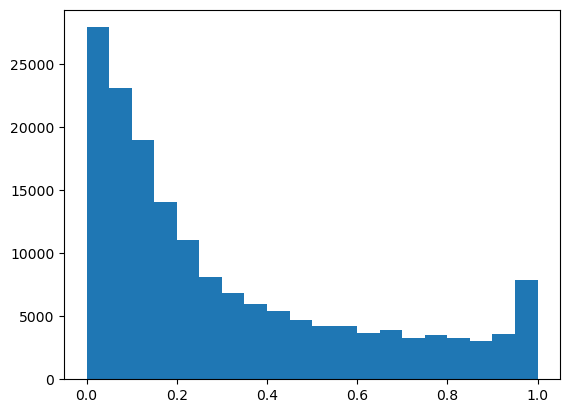

In [30]:
plt.hist(df_clean['score_misinformation'], bins=k_sm)
plt.show()

#### Word Count

In [31]:
# 1. N√∫mero de classes (k) - Regra de Sturges
n_wc = len(df_clean)
k_wc = math.ceil(1 + 3.3 * math.log10(n_wc))

# 2. Intervalo da vari√°vel
min_val_wc = df_clean['word_count'].min()
max_val_wc = df_clean['word_count'].max()

# 3. Amplitude dos intervalos
amplitude_wc = (max_val_wc - min_val_wc) / k_wc

# 4. Criar os intervalos de classe
bins_wc = [min_val_wc + i * amplitude_wc for i in range(k_wc+1)]
labels_wc = [f"[{round(bins_wc[i], 2)}, {round(bins_wc[i+1], 2)})" for i in range(k_wc)]

# 5. Classificar os dados
df_clean['classe_wc'] = pd.cut(df_clean['word_count'], bins=bins_wc, labels=labels_wc, include_lowest=True, right=False)

# 6. Frequ√™ncias
frequencia_abs_wc = df_clean['classe_wc'].value_counts().reindex(labels_wc, fill_value=0)
frequencia_rel_wc = (frequencia_abs_wc / n_wc).round(4)
frequencia_per_wc = (frequencia_rel_wc * 100).round(2)
frequencia_acum_per_wc = frequencia_per_wc.cumsum()
densidade_wc = (frequencia_rel_wc / amplitude_wc).round(4)
# Calcular pontos m√©dios de cada classe
pontos_medios_wc = [round((bins_wc[i] + bins_wc[i+1]) / 2, 4) for i in range(k_wc)]


# 7. Tabela final
tabela_frequencia_wc = pd.DataFrame({
    'Classe': labels_wc,
    'Frequ√™ncia Absoluta': frequencia_abs_wc.values,
    'Frequ√™ncia Relativa': frequencia_rel_wc.values,
    'Frequ√™ncia Percentual': frequencia_per_wc.values,
    'Frequ√™ncia Acumulada (%)': frequencia_acum_per_wc.values,
    'Densidade': densidade_wc.values,
    'Ponto M√©dio': pontos_medios_wc,
})


# 8. Exibir
print("Tabela de Frequ√™ncia: Word Count")
tabela_frequencia_wc

Tabela de Frequ√™ncia: Word Count


Classe  Frequ√™ncia Absoluta  Frequ√™ncia Relativa  \
0      [5.0, 54.45)               280703               0.8304   
1    [54.45, 103.9)                33177               0.0981   
2   [103.9, 153.35)                 9834               0.0291   
3   [153.35, 202.8)                 4296               0.0127   
4   [202.8, 252.25)                 2435               0.0072   
5   [252.25, 301.7)                 1375               0.0041   
6   [301.7, 351.15)                 1372               0.0041   
7   [351.15, 400.6)                 1131               0.0033   
8   [400.6, 450.05)                  709               0.0021   
9   [450.05, 499.5)                  508               0.0015   
10  [499.5, 548.95)                  456               0.0013   
11  [548.95, 598.4)                  482               0.0014   
12  [598.4, 647.85)                  596               0.0018   
13  [647.85, 697.3)                  471               0.0014   
14  [697.3, 746.75)                  379               0.0011   
15  [746.75, 796.2)                   22               0.0001   
16  [796.2, 845.65)                    6               0.0000   
17  [845.65, 895.1)                   51               0.0002   
18  [895.1, 944.55)                   27               0.0001   
19  [944.55, 994.0)                    8               0.0000   

    Frequ√™ncia Percentual  Frequ√™ncia Acumulada (%)  Densidade  Ponto M√©dio  
0                   83.04                     83.04     0.0168       29.725  
1                    9.81                     92.85     0.0020       79.175  
2                    2.91                     95.76     0.0006      128.625  
3                    1.27                     97.03     0.0003      178.075  
4                    0.72                     97.75     0.0001      227.525  
5                    0.41                     98.16     0.0001      276.975  
6                    0.41                     98.57     0.0001      326.425  
7                    0.33                     98.90     0.0001      375.875  
8                    0.21                     99.11     0.0000      425.325  
9                    0.15                     99.26     0.0000      474.775  
10                   0.13                     99.39     0.0000      524.225  
11                   0.14                     99.53     0.0000      573.675  
12                   0.18                     99.71     0.0000      623.125  
13                   0.14                     99.85     0.0000      672.575  
14                   0.11                     99.96     0.0000      722.025  
15                   0.01                     99.97     0.0000      771.475  
16                   0.00                     99.97     0.0000      820.925  
17                   0.02                     99.99     0.0000      870.375  
18                   0.01                    100.00     0.0000      919.825  
19                   0.00                    100.00     0.0000      969.275

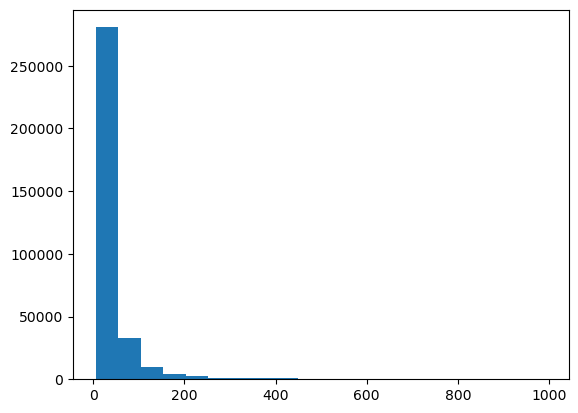

In [32]:
plt.hist(df_clean['word_count'], bins=k_sm)
plt.show()

### 4. Boxplot

<Axes: >

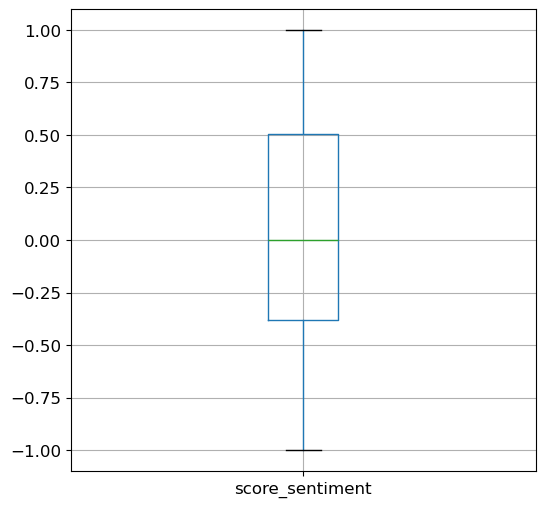

In [33]:
df_clean.boxplot(column=['score_sentiment'], fontsize='large', figsize=(6,6))

<Axes: >

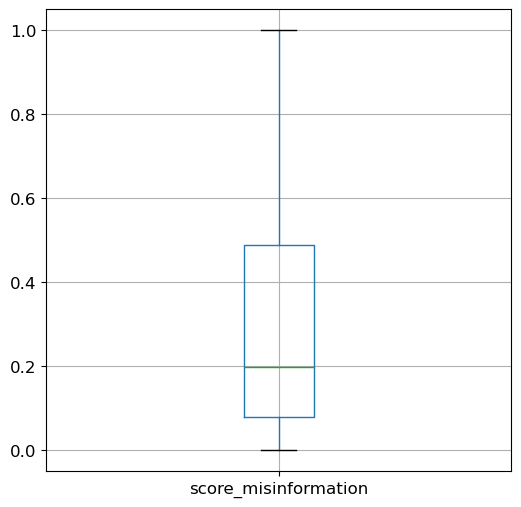

In [34]:
df_clean.boxplot(column=['score_misinformation'], fontsize='large', figsize=(6,6))

<Axes: >

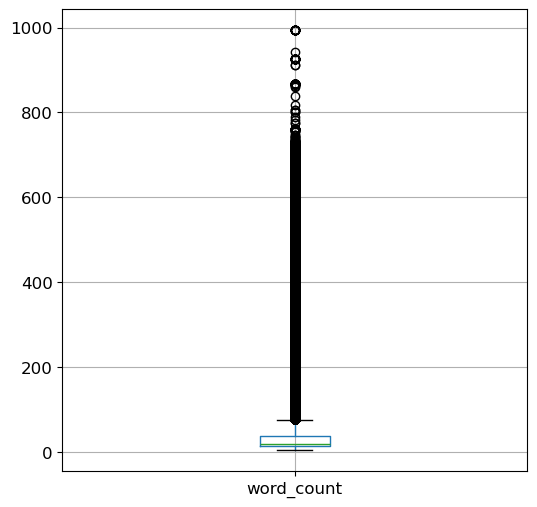

In [35]:
df_clean.boxplot(column=['word_count'], fontsize='large', figsize=(6,6))

### 5. QQ-Plot

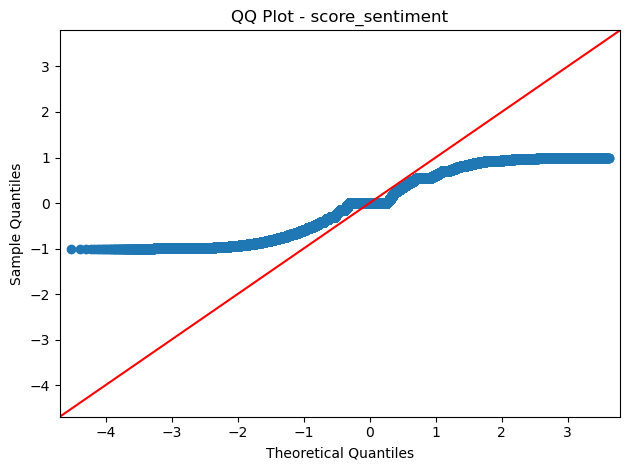

In [36]:
sm.qqplot(df_clean['score_sentiment'], line='45')
plt.title('QQ Plot - score_sentiment')
plt.tight_layout()
plt.show()

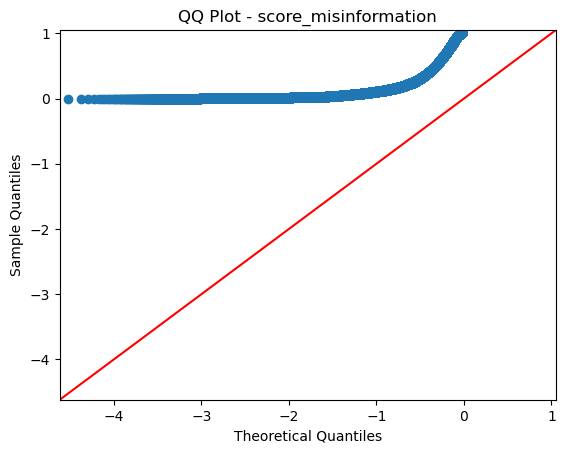

In [37]:
sm.qqplot(df_clean['score_misinformation'], line='45')
plt.title('QQ Plot - score_misinformation')
plt.show()

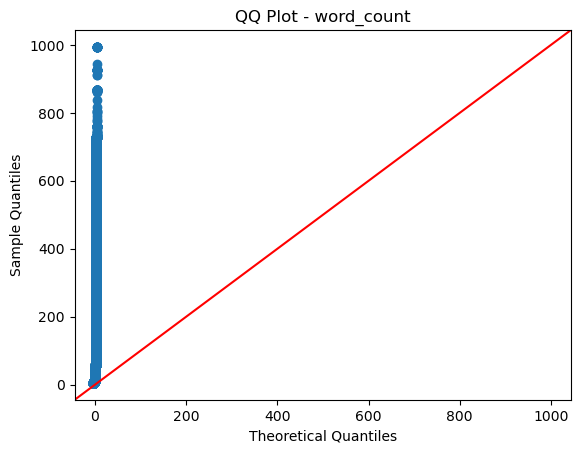

In [38]:
sm.qqplot(df_clean['word_count'], line='45')
plt.title('QQ Plot - word_count')
plt.show()

### 6. Teste de Normalidade

#### Score Sentiment

In [41]:
data_ss = df_clean['score_sentiment'].dropna()

shapiro_ss = stats.shapiro(data_ss)
lilliefors_ss = sm.stats.diagnostic.lilliefors(data_ss, dist='norm', pvalmethod='table')
jarque_bera_ss = stats.jarque_bera(data_ss)
normaltest_ss = stats.normaltest(data_ss)

/opt/conda/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.


In [44]:
results_df_ss = pd.DataFrame({
    'Test': ['Shapiro-Wilk', 'Lilliefors', 'Jarque-Bera', 'D‚ÄôAgostino-Pearson'],
    'Statistic': [shapiro_ss.statistic, lilliefors_ss[0], jarque_bera_ss.statistic, normaltest_ss.statistic],
    'p-value': [shapiro_ss.pvalue, lilliefors_ss[1], jarque_bera_ss.pvalue, normaltest_ss.pvalue],
    'Is Normal (p ‚â• 0.05)': [
        shapiro_ss.pvalue >= 0.05,
        lilliefors_ss[1] >= 0.05,
        jarque_bera_ss.pvalue >= 0.05,
        normaltest_ss.pvalue >= 0.05
    ]
})
results_df_ss

Test     Statistic  p-value  Is Normal (p ‚â• 0.05)
0        Shapiro-Wilk      0.963528    0.000                 False
1          Lilliefors      0.121526    0.001                 False
2         Jarque-Bera  12054.398175    0.000                 False
3  D‚ÄôAgostino-Pearson  51573.958937    0.000                 False

#### Score Misinformation

In [46]:
data_sm = df_clean['score_misinformation'].dropna()

shapiro_sm = stats.shapiro(data_sm)
lilliefors_sm = sm.stats.diagnostic.lilliefors(data_sm, dist='norm', pvalmethod='table')
jarque_bera_sm = stats.jarque_bera(data_sm)
normaltest_sm = stats.normaltest(data_sm)

/opt/conda/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.


In [47]:
results_df_sm = pd.DataFrame({
    'Test': ['Shapiro-Wilk', 'Lilliefors', 'Jarque-Bera', 'D‚ÄôAgostino-Pearson'],
    'Statistic': [shapiro_sm.statistic, lilliefors_sm[0], jarque_bera_sm.statistic, normaltest_sm.statistic],
    'p-value': [shapiro_sm.pvalue, lilliefors_sm[1], jarque_bera_sm.pvalue, normaltest_sm.pvalue],
    'Is Normal (p ‚â• 0.05)': [
        shapiro_sm.pvalue >= 0.05,
        lilliefors_sm[1] >= 0.05,
        jarque_bera_sm.pvalue >= 0.05,
        normaltest_sm.pvalue >= 0.05
    ]
})
results_df_sm

Test     Statistic  p-value  Is Normal (p ‚â• 0.05)
0        Shapiro-Wilk      0.855440    0.000                 False
1          Lilliefors      0.155665    0.001                 False
2         Jarque-Bera  27025.231937    0.000                 False
3  D‚ÄôAgostino-Pearson  19688.873582    0.000                 False

#### Word Count

In [48]:
data_wc = df_clean['word_count'].dropna()

shapiro_wc = stats.shapiro(data_wc)
lilliefors_wc = sm.stats.diagnostic.lilliefors(data_wc, dist='norm', pvalmethod='table')
jarque_bera_wc = stats.jarque_bera(data_wc)
normaltest_wc = stats.normaltest(data_wc)

/opt/conda/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.


In [50]:
results_df_wc = pd.DataFrame({
    'Test': ['Shapiro-Wilk', 'Lilliefors', 'Jarque-Bera', 'D‚ÄôAgostino-Pearson'],
    'Statistic': [shapiro_wc.statistic, lilliefors_wc[0], jarque_bera_wc.statistic, normaltest_wc.statistic],
    'p-value': [shapiro_wc.pvalue, lilliefors_wc[1], jarque_bera_wc.pvalue, normaltest_wc.pvalue],
    'Is Normal (p ‚â• 0.05)': [
        shapiro_wc.pvalue >= 0.05,
        lilliefors_wc[1] >= 0.05,
        jarque_bera_wc.pvalue >= 0.05,
        normaltest_wc.pvalue >= 0.05
    ]
})
results_df_wc

Test     Statistic  p-value  Is Normal (p ‚â• 0.05)
0        Shapiro-Wilk  4.181942e-01    0.000                 False
1          Lilliefors  3.084102e-01    0.001                 False
2         Jarque-Bera  2.279360e+07    0.000                 False
3  D‚ÄôAgostino-Pearson  3.616676e+05    0.000                 False

### 7. Best Fit Distribution (usando diferentes m√©todos)

In [51]:
dist_names = [
    'beta',
    'expon',
    'gamma',
    'lognorm',
    'norm',
    'pearson3',
    't',
    'triang',
    'uniform',
    'weibull_min',
    'weibull_max'
]

In [52]:
def check_distribution(dist_names, y_std, column_name):

    p_values = []
    distance = []
    D_less_p = []

    for distribution in dist_names:
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')

        #p = np.around(p, 5)
        p_values.append(p)

        #D = np.around(D, 5)
        distance.append(D)

        if D<p:
            D_less_p.append("yes")
        else:
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p

    results.sort_values(['p_value'], ascending=False, inplace=True)


    print (f'\n${column_name} - Distributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

#### Score Sentiment

In [53]:
scores_ss = df_clean['score_sentiment']
scores_clean_ss = scores_ss.dropna()
z_scores_ss = stats.zscore(scores_clean_ss)

In [54]:
check_distribution(dist_names, z_scores_ss, 'score_sentiment')

/opt/conda/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log



$score_sentiment - Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
0          beta  0.118371      0.0  no
1         expon  0.247807      0.0  no
2         gamma  0.118801      0.0  no
3       lognorm  0.119172      0.0  no
4          norm  0.121526      0.0  no
5      pearson3  0.131865      0.0  no
6             t  0.121526      0.0  no
7        triang  0.118145      0.0  no
8       uniform  0.124071      0.0  no
9   weibull_min  0.114634      0.0  no
10  weibull_max  0.143595      0.0  no


/tmp/ipykernel_170/3468552133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



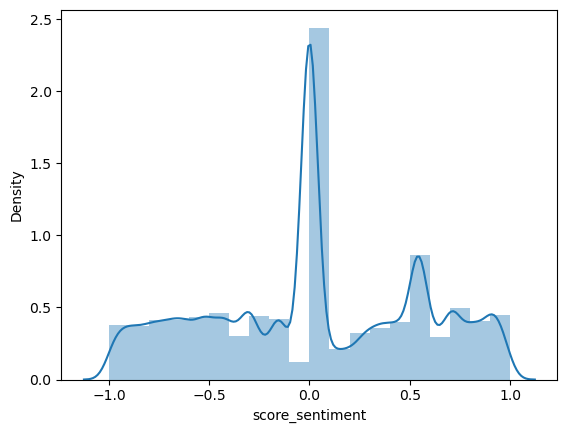

In [55]:
sns.distplot(scores_clean_ss, bins=k_ss)
plt.show()

#### Score Misinformation

In [56]:
scores_sm = df_clean['score_misinformation']
scores_clean_sm = scores_sm.dropna()
z_scores_sm = stats.zscore(scores_clean_sm)

In [57]:
check_distribution(dist_names, z_scores_sm, 'score_misinformation')

/opt/conda/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
/opt/conda/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log



$score_misinformation - Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
5      pearson3  0.046544  1.043994e-313  no
2         gamma  0.046708  6.456362e-316  no
0          beta  0.107844   0.000000e+00  no
1         expon  0.048517   0.000000e+00  no
3       lognorm  0.068144   0.000000e+00  no
4          norm  0.155665   0.000000e+00  no
6             t  0.155665   0.000000e+00  no
7        triang  0.176090   0.000000e+00  no
8       uniform  0.322736   0.000000e+00  no
9   weibull_min  0.047291   0.000000e+00  no
10  weibull_max  0.114616   0.000000e+00  no


/tmp/ipykernel_170/3178108108.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



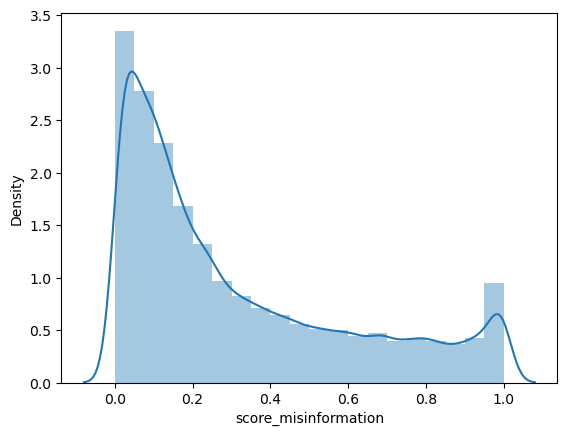

In [58]:
sns.distplot(scores_clean_sm, bins=k_sm)
plt.show()

#### Word Count

In [59]:
scores_wc = df_clean['word_count']
scores_clean_wc = scores_wc.dropna()
z_scores_wc = stats.zscore(scores_clean_wc)

In [60]:
check_distribution(dist_names, z_scores_wc, 'word_count')

/opt/conda/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
/opt/conda/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
/opt/conda/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log



$word_count - Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
0          beta  0.169670      0.0  no
1         expon  0.193813      0.0  no
2         gamma  0.600445      0.0  no
3       lognorm  0.101223      0.0  no
4          norm  0.272028      0.0  no
5      pearson3  0.146885      0.0  no
6             t  0.204806      0.0  no
7        triang  0.632510      0.0  no
8       uniform  0.831093      0.0  no
9   weibull_min  0.242006      0.0  no
10  weibull_max  0.212255      0.0  no


/tmp/ipykernel_170/1053833618.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



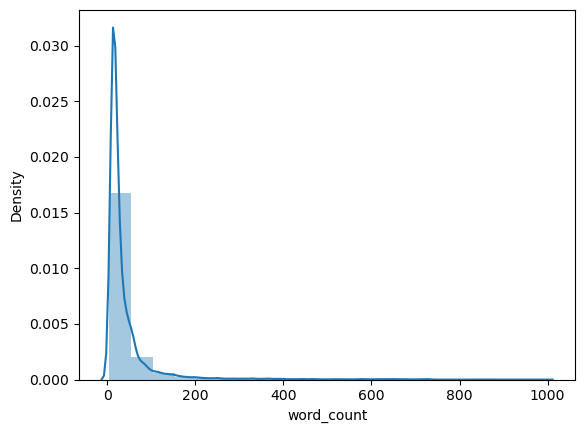

In [61]:
sns.distplot(scores_clean_wc, bins=k_wc)
plt.show()

## f) Para cada par de atributos n√∫mericos apresente

### 1. O Coeficiente de Correla√ß√£o apropriado

Como nenhum dado segue a distribui√ß√£o normal, utilizaremos a Correla√ß√£o de Spearman

In [62]:
valid_data = df_clean[['score_sentiment', 'score_misinformation', 'word_count']].dropna()
v_ss = valid_data['score_sentiment']
v_sm = valid_data['score_misinformation']
v_wc = valid_data['word_count']

In [68]:
pd.DataFrame({
    "Spearman's rank": {
        'score_sentiment vs score_misinformation': stats.spearmanr(v_ss, v_sm)[0],
        'score_sentiment vs word_count': stats.spearmanr(v_ss, v_wc)[0],
        'score_misinformation vs word_count': stats.spearmanr(v_sm, v_wc)[0]
    },
    'p-value': {
        'score_sentiment vs score_misinformation': stats.spearmanr(v_ss, v_sm)[1],
        'score_sentiment vs word_count': stats.spearmanr(v_ss, v_wc)[1],
        'score_misinformation vs word_count': stats.spearmanr(v_sm, v_wc)[1]
    },
})

Spearman's rank        p-value
score_sentiment vs score_misinformation        -0.388778   0.000000e+00
score_sentiment vs word_count                  -0.070774  9.887904e-184
score_misinformation vs word_count              0.179315   0.000000e+00

### 2. Um Gr√°fico de Dispers√£o

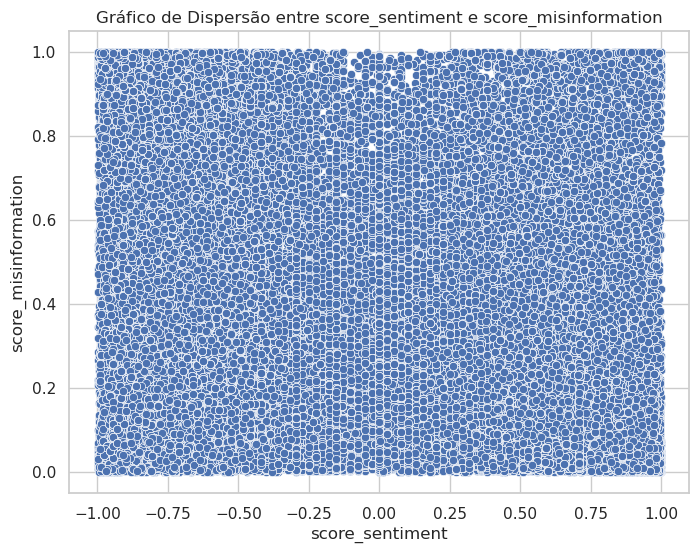

In [69]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='score_sentiment', y='score_misinformation', data=valid_data)
plt.title('Gr√°fico de Dispers√£o entre score_sentiment e score_misinformation')
plt.show()

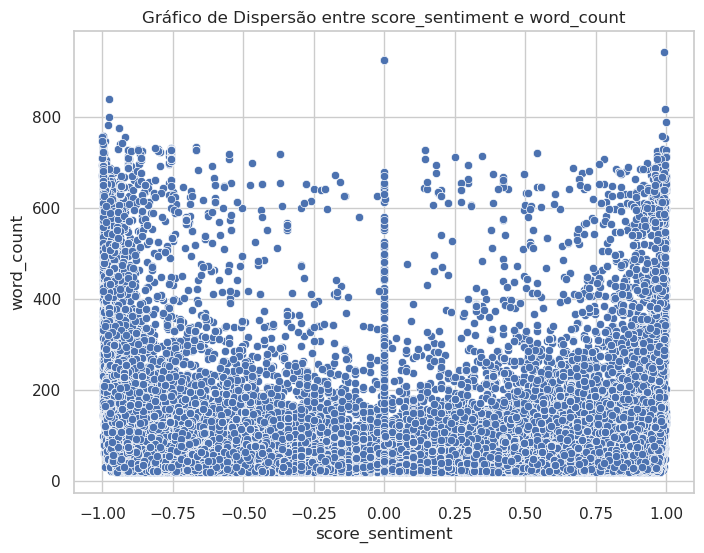

In [70]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='score_sentiment', y='word_count', data=valid_data)
plt.title('Gr√°fico de Dispers√£o entre score_sentiment e word_count')
plt.show()

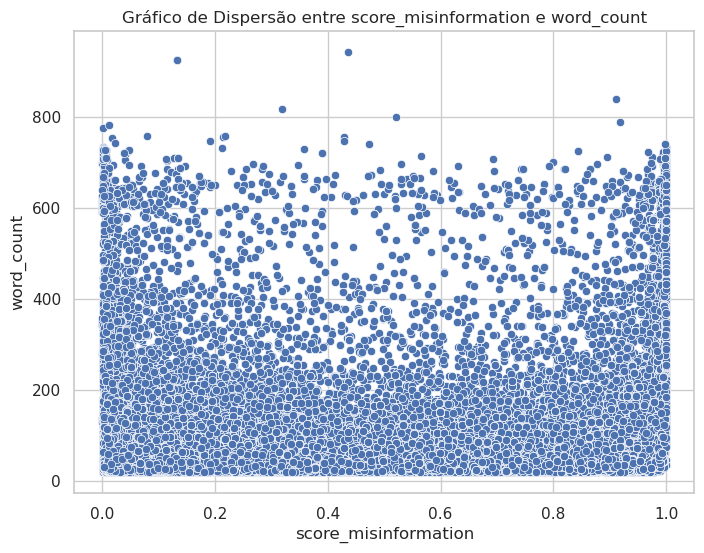

In [73]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='score_misinformation', y='word_count', data=valid_data)
plt.title('Gr√°fico de Dispers√£o entre score_misinformation e word_count')
plt.show()

## g) Para cada par de atributos categ√≥ricos apresente

In [81]:
category_columns

['media_type',
 'has_media',
 'message_type',
 'messenger',
 'viral',
 'misinformation_category',
 'sentiment']

In [82]:
categories_valid_data = df_clean[category_columns].dropna()

In [83]:
categories_valid_data.describe()

media_type has_media message_type messenger   viral  \
count      126125    126125       126125    126125  126125   
unique         41         1            7         1       2   
top     image/jpg      True       Imagem  telegram    True   
freq        78111    126125        78960    126125   85115   

       misinformation_category sentiment  
count                   126125    126125  
unique                       3         3  
top         Non-misinformation  Positive  
freq                    106891     54857

In [84]:
categories_valid_data = categories_valid_data.drop(columns=['has_media', 'messenger'])

### 1. O resultado do m√©todo V de Cramer

In [85]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))  # Bias correction
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

columns = categories_valid_data.columns
cramers_v_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

# Calcular v de cramer
for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            v = cramers_v(categories_valid_data[col1], categories_valid_data[col2])
            cramers_v_matrix.loc[col1, col2] = v

In [86]:
cramers_v_matrix

media_type  message_type     viral  \
media_type                 1.000000      0.919455  0.123356   
message_type               0.919455      1.000000  0.118222   
viral                      0.123356      0.118222  1.000000   
misinformation_category    0.061285      0.057601  0.076546   
sentiment                  0.229577      0.222639  0.080694   

                         misinformation_category  sentiment  
media_type                              0.061285   0.229577  
message_type                            0.057601   0.222639  
viral                                   0.076546   0.080694  
misinformation_category                 1.000000   0.179146  
sentiment                               0.179146   1.000000

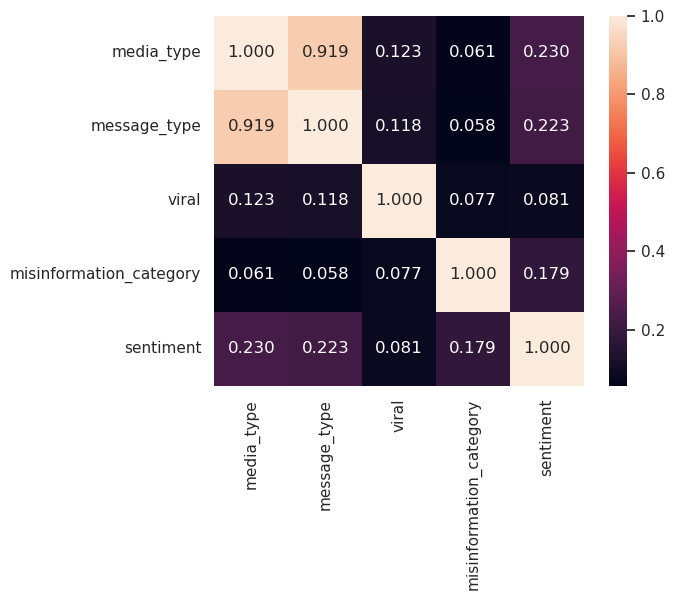

In [87]:
sns.heatmap(cramers_v_matrix, annot=True, fmt=".3f", square=True)
plt.show()

## h) Crie uma visualiza√ß√£o (gr√°fico) para apresentar

### 1. As quantidades de grupos, usu√°rios e mensagens

In [88]:
meta_data_quant = conn.execute("SELECT COUNT(*) AS total_messages, COUNT(DISTINCT id_member_anonymous) AS total_users, COUNT(DISTINCT id_group_anonymous) AS total_groups FROM messages").df()
meta_data_quant

total_messages  total_users  total_groups
0          338045        11340           177

### 2. A quantidade de mensagens que possuem apenas texto X m√≠dia

In [89]:
quant_messages_by_content = conn.execute("""
SELECT
  COUNT(CASE WHEN text_content_anonymous IS NOT NULL AND has_media = False THEN 1 END) AS only_text,
  COUNT(CASE WHEN has_media = True AND text_content_anonymous IS NOT NULL THEN 1 END) AS with_media
FROM messages
""").df()

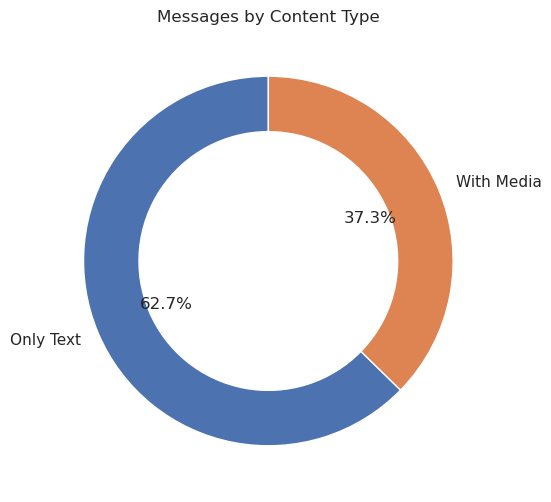

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    quant_messages_by_content.iloc[0].values,
    labels=['Only Text', 'With Media'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)

ax.set(aspect="equal", title='Messages by Content Type')

plt.show()

### 3. Quantidade de mensagens por tipo de m√≠dia (jpg, mp4 etc)

In [91]:
quant_messages_per_media_type_df = conn.execute("""
SELECT media_type, COUNT(*) AS total_messages
FROM messages
WHERE has_media = True
GROUP BY media_type
ORDER BY total_messages DESC
LIMIT 10
""").df()

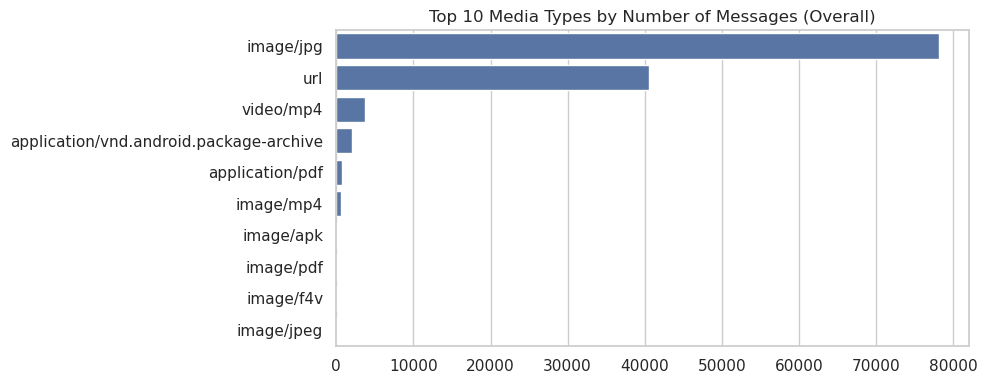

In [92]:
plt.figure(figsize=(10, 4))
sns.barplot(
    data=quant_messages_per_media_type_df,
    x='total_messages',
    y='media_type',
)

plt.title('Top 10 Media Types by Number of Messages (Overall)')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()

plt.show()

In [93]:
media_category_df = conn.execute("""
SELECT
  CASE
    WHEN media_type = 'url' THEN 'url'
    ELSE SPLIT_PART(media_type, '/', 1)
  END AS media_category,
  COUNT(*) AS total_messages
FROM messages
WHERE has_media = TRUE
GROUP BY media_category
ORDER BY total_messages DESC
""").df()
media_category_df

media_category  total_messages
0          image           78962
1            url           40558
2          video            3780
3    application            2802
4          audio              22
5           text               1

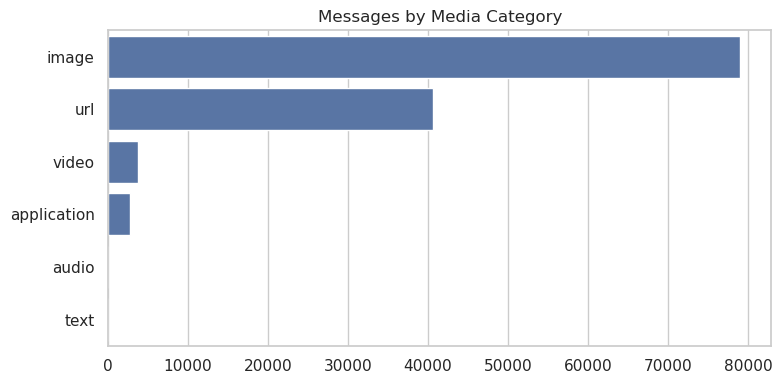

In [94]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=media_category_df,
    x='total_messages',
    y='media_category',
)

plt.title('Messages by Media Category')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()

plt.show()

### 4. Rela√ß√£o entre a quantidade de mensagens e a quantidade de palavras presente nas mensagens

/tmp/ipykernel_170/419426766.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



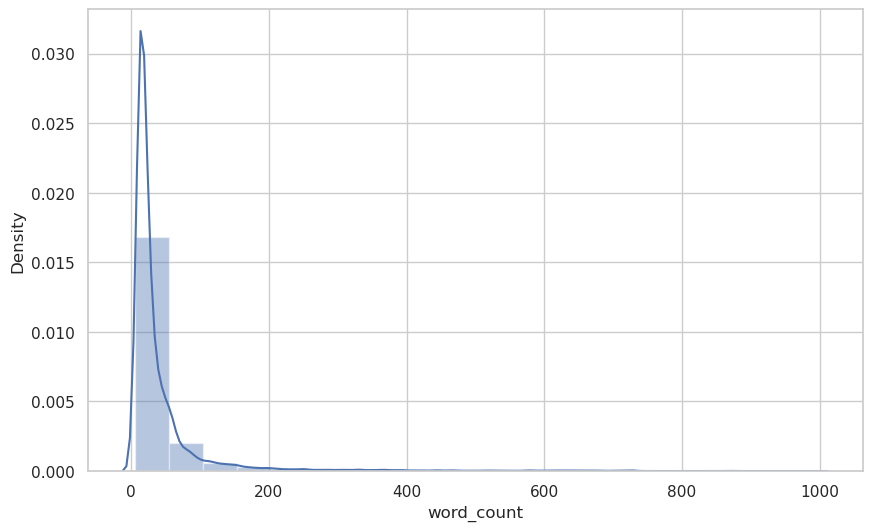

In [95]:
plt.figure(figsize=(10, 6))
sns.distplot(scores_clean_wc, bins=k_wc)
plt.show()

/tmp/ipykernel_170/590929133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



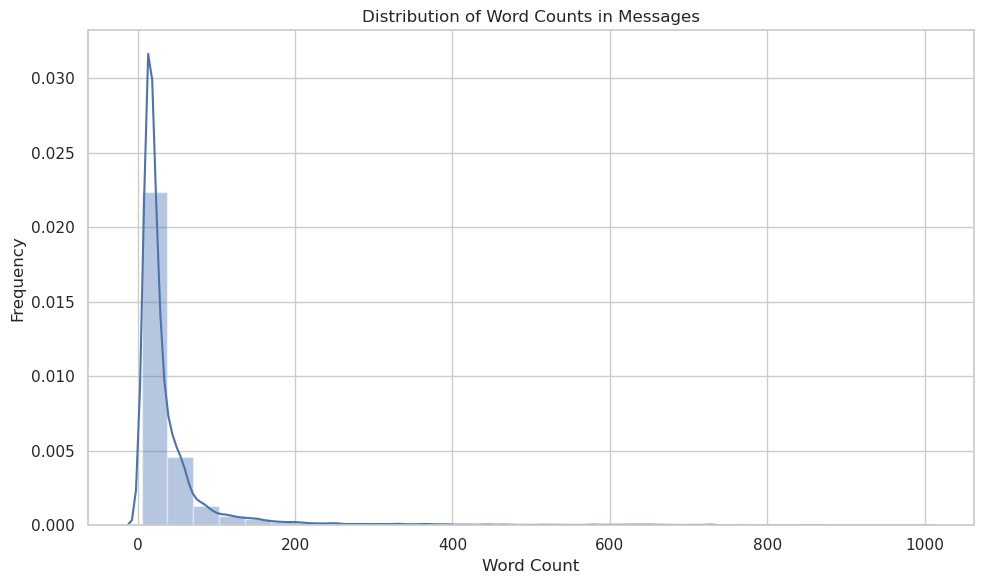

In [96]:
plt.figure(figsize=(10, 6))
sns.distplot(df_clean['word_count'], bins=30)

plt.title('Distribution of Word Counts in Messages')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 5. Quantidade de mensagens por estado

### 6. Quantidade de usu√°rios por estado

### 7. Rela√ß√£o quantidade de usu√°rios por quantidade de mensagens por estado

### 8. Quantidade de mensagens por pa√≠s

### 9. Quantidade de mensagens Brasil X Pa√≠ses Estrangeiros

N√£o h√° informa√ß√µes sobre estado

### 10. A 30 URLs que mais se repetem

In [97]:
top_urls = conn.execute("""
SELECT media_url as url, COUNT(*) AS total
FROM messages
WHERE url IS NOT NULL
GROUP BY url
ORDER BY total DESC
LIMIT 30
""").df()
top_urls

url  total
0                                   t.me/alexeconomia   4046
1     https://youtube.com/c/especulandoosfatosoficial   1607
2                                   t.me/fimtaproximo   1579
3                              t.me/+EWlGMatRZGg3OTlh   1419
4                              t.me/+ewZIPdZ42vEyNzJh    772
5                https://t.me/canalselvabrasiloficial    708
6                           T.me/Arthur_Senna_Trader2    631
7                              t.me/+bseuTTFOO8c5YWFh    515
8                            youtube.com/AlexEconomia    445
9                      https://t.me/+DnJpx-HxNCFkMmUx    390
10                          https://t.me/Ovetoroculto    382
11                       https://youtu.be/qbTzhB0akt8    363
12                         https://t.me/ipiranoticias    358
13  https://youtube.com/channel/UCVvPvyD-zdnTTapAb...    349
14          https://t.me/ContagemDeVotosPRO_BOLSONARO    322
15                       https://youtu.be/4DHk9KZ01HM    295
16  https://instagram.com/exercito_oficial?igshid=...    283
17                       https://youtu.be/zDuOoyhyN-4    278
18                             t.me/+L987ddlsBJVkYzAx    272
19  https://scriptsamp.forumeiros.com/t16154-enque...    260
20                  http://ligapatriota.blogspot.com/    243
21                        t.me/direitologicoparatodos    240
22            https://t.me/Manager_Marcus_Chat_Up_Now    211
23                            https://t.me/R_ALLIANCE    207
24      https://t.me/Votei_Bolsonaro_22_Distrito_Fede    196
25                          https://www.bolsonaro.tv/    180
26                       https://youtu.be/x2uiakywcrI    176
27                              T.me/Leonidaschavesbc    171
28                              T.me/LeonidasChavesbc    167
29              https://m.youtube.com/user/jbolsonaro    149

### 11. Os 30 dom√≠nios que mais se repetem

In [98]:
regex_domains = "LOWER(regexp_extract(regexp_replace(media_url, 'https?://(www\.)?', ''), '^([^/]+)', 1))"
top_domains = conn.execute(f"""
WITH domain_stats AS (
    SELECT
        {regex_domains} AS domain,
        COUNT(*) AS total,
        COUNT(DISTINCT media_url) AS unique_urls,
        COUNT(DISTINCT id_member_anonymous) AS unique_users
    FROM messages
    WHERE media_url IS NOT NULL
    GROUP BY domain
)
SELECT *
FROM domain_stats
ORDER BY total DESC
LIMIT 30

""").df()
top_domains

domain  total  unique_urls  unique_users
0                            t.me  19187         1813           783
1                        youtu.be  12936         4439           900
2                     youtube.com   7273         1935           456
3         terrabrasilnoticias.com   6460         2297           204
4     jornaldacidadeonline.com.br   4391          798           157
5                   instagram.com   1690          797           320
6                      pleno.news   1422          690            65
7                     twitter.com   1168          579           201
8     aliadosbrasiloficial.com.br    918          353            46
9         verdadecensurada.com.br    792          138            23
10             vistapatria.com.br    772          272            55
11               revistaoeste.com    767          427            71
12                 kwai-video.com    751          679            76
13         conexaopolitica.com.br    651          344            44
14         tribunanacional.com.br    583          113            23
15               apostagem.com.br    568          566             0
16           direitaonline.com.br    415          277            13
17            gazetabrasil.com.br    380          158            52
18                         gov.br    360           49            79
19                      gettr.com    355          235            80
20                   bitchute.com    347           88            13
21                         bit.ly    338          187            56
22          img.theepochtimes.com    333          316             0
23                   g1.globo.com    310          231            41
24                  m.youtube.com    306           67            70
25                           t.co    295          193            37
26                     rumble.com    292          169            49
27              veja.abril.com.br    286          113            53
28  coletividade-evolutiva.com.br    282          122            14
29      scriptsamp.forumeiros.com    260            1             2

### 12. Os 30 usu√°rios mais ativos

In [99]:
top_users = conn.execute("""
SELECT
    id_member_anonymous,
    COUNT(*) AS total,
    COUNT(CASE WHEN has_media THEN 1 ELSE null END) AS media_count
FROM messages
WHERE id_member_anonymous IS NOT NULL
GROUP BY id_member_anonymous
ORDER BY total DESC
LIMIT 30
""").df()
top_users

id_member_anonymous  total  media_count
0   abe534d581ec6d552243d6955d3c3cd8  12289            0
1   1665e22b0f564cd46d343f7677014821   5452         2972
2   1ac091b8ed5c4e42383f1b4ff4cc9b2d   3235         2820
3   c743967449a387ad2c1c7e03b2c45b36   3017          152
4   d49f81df0c75d1d72bee6c5b2d707da0   1571            0
5   f233cf8b1d4ede06f32199a7e0081bf5   1085           70
6   e8fd8fee8c39342d37993775da7756d5   1027          329
7   e7998863ac2a40086657fab4a6b463c9    921          493
8   c052c859b42c5a1923c22f5a201de746    831          736
9   fa582c9e95da255e44f4c198d0daf3df    816          700
10  773b9bd5b02a2e96f9d732c29bfcb663    761          521
11  56b8359fd127312651b80b8ed8030085    627          501
12  7696d5103cdb8ac352d748a1db1126b0    626           66
13  a378e9743fa3ca297df321cfa0e7cf6a    611           16
14  fbbbfb737acb18812f7de2400841abc3    593          351
15  566ba5c5eeeac2fc18b65965c3909a1f    581          296
16  e5e3e38d433016adf62ea34432853a3c    579          231
17  9b34f45b5f8af4c37ba9ec1ebe2e3606    527          280
18  53e74af95497f943c524abaaa9482e33    525          460
19  a398999c55f8d6f0c65760522ae12e45    520          118
20  f4561a21fb26cfbebf48dcd5c557f82f    514          214
21  beb77036ff26e78865da19310ac95169    512          419
22  26b496125c8b6773bce453e14f172430    505            3
23  7d41f1a2df245b0cc870f546c2aead0b    483            0
24  b4ce87d44421ef3d2c4710051df5fe40    478            0
25  bd7859770eef94f34d0344a5397c5443    469          248
26  79fa510c3ab44548d903284ab9162c9d    464          338
27  9794a13f91433216821ad18624372498    462          458
28  5d321b03e74b751ac577ef022350306d    451          449
29  3f64a652deccf6273d7d769252bdfb46    444          433

### 13. Rela√ß√£o entre quantidade de mensagens contendo apenas texto e mensagem contendo m√≠dia dos usu√°rios

In [100]:
top_users_breakdown = conn.execute("""
SELECT
    id_member_anonymous,
    COUNT(*) AS total_messages,
    SUM(CASE WHEN has_media THEN 1 ELSE 0 END) AS media_messages,
    SUM(CASE WHEN has_media THEN 0 ELSE 1 END) AS text_only_messages
FROM messages
WHERE id_member_anonymous IS NOT NULL
GROUP BY id_member_anonymous
ORDER BY total_messages DESC
LIMIT 30
""").df()

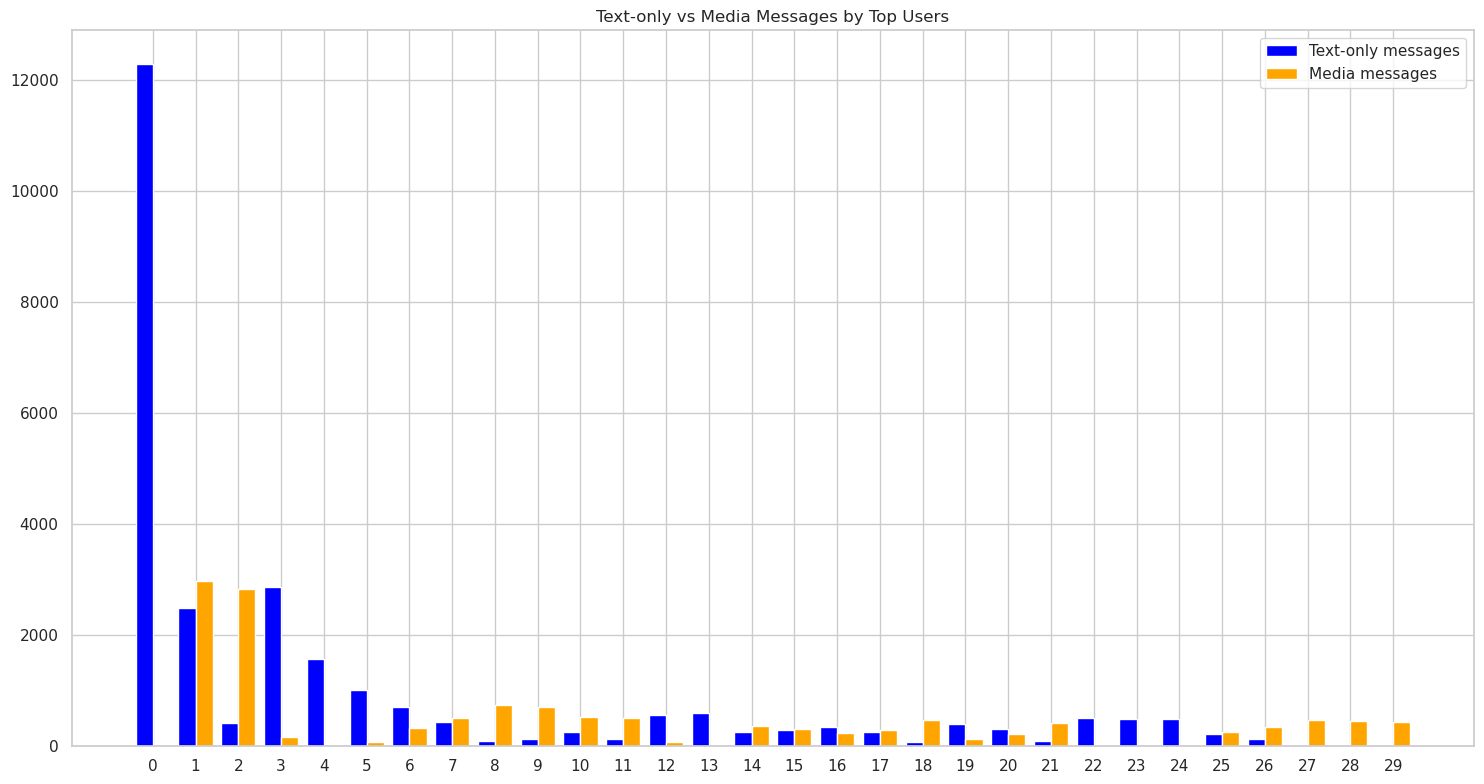

In [101]:
fig, ax = plt.subplots(figsize=(15, 8))

indices = range(len(top_users_breakdown))

bar_width = 0.4
ax.bar(indices, top_users_breakdown['text_only_messages'], width=bar_width, label='Text-only messages', color='blue')
ax.bar([i + bar_width for i in indices], top_users_breakdown['media_messages'], width=bar_width, label='Media messages', color='orange')

ax.set_xticks([i + bar_width/2 for i in indices])
ax.set_xticklabels(indices)
ax.set_title('Text-only vs Media Messages by Top Users')
ax.legend()
plt.tight_layout()
plt.show()

### 14. Os 30 usu√°rios que mais compartilharam texto

In [102]:
top_users_text_only = conn.execute("""
SELECT
    id_member_anonymous,
    COUNT(*) AS text_only_messages
FROM messages
WHERE id_member_anonymous IS NOT NULL
GROUP BY id_member_anonymous
ORDER BY text_only_messages DESC
LIMIT 30
""").df()
top_users_text_only

id_member_anonymous  text_only_messages
0   abe534d581ec6d552243d6955d3c3cd8               12289
1   1665e22b0f564cd46d343f7677014821                5452
2   1ac091b8ed5c4e42383f1b4ff4cc9b2d                3235
3   c743967449a387ad2c1c7e03b2c45b36                3017
4   d49f81df0c75d1d72bee6c5b2d707da0                1571
5   f233cf8b1d4ede06f32199a7e0081bf5                1085
6   e8fd8fee8c39342d37993775da7756d5                1027
7   e7998863ac2a40086657fab4a6b463c9                 921
8   c052c859b42c5a1923c22f5a201de746                 831
9   fa582c9e95da255e44f4c198d0daf3df                 816
10  773b9bd5b02a2e96f9d732c29bfcb663                 761
11  56b8359fd127312651b80b8ed8030085                 627
12  7696d5103cdb8ac352d748a1db1126b0                 626
13  a378e9743fa3ca297df321cfa0e7cf6a                 611
14  fbbbfb737acb18812f7de2400841abc3                 593
15  566ba5c5eeeac2fc18b65965c3909a1f                 581
16  e5e3e38d433016adf62ea34432853a3c                 579
17  9b34f45b5f8af4c37ba9ec1ebe2e3606                 527
18  53e74af95497f943c524abaaa9482e33                 525
19  a398999c55f8d6f0c65760522ae12e45                 520
20  f4561a21fb26cfbebf48dcd5c557f82f                 514
21  beb77036ff26e78865da19310ac95169                 512
22  26b496125c8b6773bce453e14f172430                 505
23  7d41f1a2df245b0cc870f546c2aead0b                 483
24  b4ce87d44421ef3d2c4710051df5fe40                 478
25  bd7859770eef94f34d0344a5397c5443                 469
26  79fa510c3ab44548d903284ab9162c9d                 464
27  9794a13f91433216821ad18624372498                 462
28  5d321b03e74b751ac577ef022350306d                 451
29  3f64a652deccf6273d7d769252bdfb46                 444

### 15. Os 30 Usu√°rios que mais compartilharam m√≠dias

In [103]:
top_users_text_only = conn.execute("""
SELECT
    id_member_anonymous,
    COUNT(CASE WHEN has_media THEN 1 ELSE null END) AS media_count
FROM messages
WHERE id_member_anonymous IS NOT NULL AND
    has_media = True
GROUP BY id_member_anonymous
ORDER BY media_count DESC
LIMIT 30
""").df()
top_users_text_only

id_member_anonymous  media_count
0   1665e22b0f564cd46d343f7677014821         2972
1   1ac091b8ed5c4e42383f1b4ff4cc9b2d         2820
2   c052c859b42c5a1923c22f5a201de746          736
3   fa582c9e95da255e44f4c198d0daf3df          700
4   773b9bd5b02a2e96f9d732c29bfcb663          521
5   56b8359fd127312651b80b8ed8030085          501
6   e7998863ac2a40086657fab4a6b463c9          493
7   53e74af95497f943c524abaaa9482e33          460
8   9794a13f91433216821ad18624372498          458
9   5d321b03e74b751ac577ef022350306d          449
10  3f64a652deccf6273d7d769252bdfb46          433
11  beb77036ff26e78865da19310ac95169          419
12  3e49fd40fd973ee1b8f1a6d58feb4a54          412
13  eaef2dbdc2914b034116569bc8919403          374
14  fbbbfb737acb18812f7de2400841abc3          351
15  96c8dffb29c65cd1905239dc64196f03          346
16  92a98298316caf5bdbd65acfc20908a7          339
17  79fa510c3ab44548d903284ab9162c9d          338
18  6134f475127170f39fe48d53f874080e          331
19  e8fd8fee8c39342d37993775da7756d5          329
20  40743c2ea5139af088057763ab069b1a          318
21  566ba5c5eeeac2fc18b65965c3909a1f          296
22  c6f406117d909c73ea9c11de8560f5c3          290
23  9b34f45b5f8af4c37ba9ec1ebe2e3606          280
24  4d1389bd32de5dfc0a3fab14573131ac          280
25  4f7d493f0f6222d56e5b19a4f7c336cc          279
26  22da7e558d613074dc701f8a40bc955b          277
27  74ce4ba0ef6c0d51e6a508b0bb2d37b8          277
28  0f1a0bc54bfb4c24251e7a35fc02848d          275
29  f08cb953e68eddae5d1e15edf8c8df0b          267

### 16. As 30 mensagens mais compartilhadas

In [104]:
top_shared_messages = conn.execute("""
SELECT text_content_anonymous as message, COUNT(*) AS total_shares
FROM messages WHERE message IS NOT NULL OR message != ''
GROUP BY message
ORDER BY total_shares DESC
LIMIT 30
""").df()
top_shared_messages

message  total_shares
0   This community was blocked in Brazil following...         17422
1   ÿ≥⁄©ÿ≥ ŸÖÿ±ÿØÿßŸÜ ÿßÿ≤ÿ®⁄© ÿ®ÿß ÿ≤ŸÜ ÿßŸÜ⁄ØŸÑ€åÿ≥€å ÿ®ÿß ÿß€åŸÜ vpn ÿßÿ≤ ÿ≥ÿß€å...          1019
2   ŸÅ€åŸÑŸÖ ÿ≥ŸàŸæÿ± ÿ®ÿß ÿ≤€åÿ±ŸÜŸà€åÿ≥ ŸÅÿßÿ±ÿ≥€å ÿ®ÿ®€åŸÜüòçüòç\nÿ®ÿß ÿß€åŸÜ ŸÅ€åŸÑÿ™...           632
3   We had no choice but to remain in the shadows....           480
4   https://t.me/canalselvabrasiloficial\nSELVA BR...           461
5   üáÆüá∑ ÿ≥⁄©ÿ≥ ÿ®ÿß ÿØÿÆÿ™ÿ± 14 ÿ≥ÿßŸÑŸá ÿ±ÿß ÿØÿ± ÿ≥ÿß€åÿ™Ÿáÿß€å ŸæŸàÿ±ŸÜ\nÿ®€å€å...           400
6   "E conhecereis a verdade, e a verdade vos libe...           367
7   Bem vindo(a) ao grupo Ipir√° Not√≠cias. \n\nComp...           358
8                      V√≠deo de AVANY FERREIRA MULLER           195
9                    V√≠deo de Maria Teresa D  Valente           189
10  Para quem gosta de MEDICINA NATURAL, esse √©, S...           186
11                    Foto de Maria Teresa D  Valente           184
12  O Meu amigo N√ÉO sou infiltrado ... meu voto fo...           172
13                           V√≠deo de R A S G A N D O           171
14  Grupo Para Organizar 200 MIL Eleitores do Bols...           152
15  INVISTA CONOSCO E RECEBA‚úÖ\n SEU LUCRO EST√Å SEG...           130
16  BOA NOITE A TODOS. O QUE EU VOU DIZER √â S√âRIO ...           127
17  Regras do Grupo \n\n1¬∞ Regra do grupo √© respei...           127
18  üåí ENCERRAR MODO NOTURNO\n\n‚úÖ De agora em diant...           117
19  Not√≠cia de dentro do quartel. Os militares J√Å ...           116
20  üö®Pessoal, estamos correndo contra o tempo para...           107
21                 V√≠deo de Jane M.A.Coletti ‚ò∫Ô∏èüáßüá∑üáßüá∑üáßüá∑           105
22                 V√≠deo de Maria Emilia Gadelha Serr           103
23  Desculpa, pessoal, eu sei que esse pode n√£o se...            99
24  *VAMOS SEGUIR O INSTAGRAM DO EX√âRCITO BRASILEI...            98
25  J√° que lula colocou um milh√£o no podcast do fl...            97
26                    V√≠deo de Paulo Roberto Schuster            97
27  Ola pessoal acessem o nosso grupo. \n‚úÖSem ofen...            96
28  üåí MODO NOTURNO INICIADO\n\n‚ùå A partir deste mo...            94
29  ùêáùêéùêãùêÉ ùêéùêç, ùêãùêÑùêì ùêåùêÑ ùêëùêîùêç ùêÄ ùêÇùêáùêÑùêÇùêä ùêìùêé ùêÇùêéùêåùêÖùêàùêëùêå ùêòùêéùêîùêë ùêèùêÄ...            93

### 17. As 30 mensagens mais compartilhadas em grupos diferentes

In [105]:
top_shared_messages_in_groups = conn.execute("""
SELECT text_content_anonymous as message, COUNT(DISTINCT id_group_anonymous) AS total_groups
FROM messages
WHERE message IS NOT NULL AND id_group_anonymous IS NOT NULL AND message != ''
GROUP BY message
ORDER BY total_groups DESC
LIMIT 30
""").df()
top_shared_messages_in_groups

message  total_groups
0   This community was blocked in Brazil following...            59
1   BOA NOITE A TODOS. O QUE EU VOU DIZER √â S√âRIO ...            36
2   Hoje √†s 18 horas no canal Intelig√™ncia Ltda do...            35
3   DE NADA IR√Å ADIANTAR FISCALIZAR AS URNAS, SE N...            29
4   Ajudem a subir a #JanonesAmigoDePedofilo\n\nPo...            29
5   *ATEN√á√ÉO* \nüö®üö®üö®üö®üö®üö®üö®üö®üö®\n\n*CHAMADA URGENTE* Pat...            29
6   OS PTISTAS N√ÉO QUER QUE AGENTE MOSTRE QUE VOTO...            29
7   OS ELEITORES QUE JA ENVIOU, N√ÉO PRECISA MAIS E...            28
8   BRASILEIROS, PIOR DE QUE VOC√äS PERDEREM SEUS C...            28
9   PESSOAL, POSTE SEU COMPROVANTE DE VOTO.\n\nSER...            27
10  SE VOC√ä ACREDITA QUE BOLSONARO GANHOU NO PRIME...            27
11  Enviando por email Habeas corpus - STJ - POVO-...            27
12  Lan√ßaram o Lulaflix, uma colet√¢nea com o que d...            27
13            Enviando por email requerimento GSI.pdf            27
14  Os grupos 'MEU VOTO √â BOLSONARO 22' ficaram ab...            27
15  Queridos amigos Patriotas, \n\nSegue o sentime...            27
16  Prezados Brasileiros Patriotas, \nSauda√ß√µes,\n...            27
17  Enviando por email REPRESENTACÃßAÃÉO - PrisaÃÉo M...            27
18  QUANDO ESTIVER ZERO MEMBROAQUI, TEREMOS A CERT...            26
19  CONTAGEM P√öBLICA DE VOTOS PRO BOLSONARO22 2‚Å∞ T...            26
20  - Contra tudo e contra todos, tivemos no 1¬∞ tu...            26
21  PNDH3\n\nPROGRAMA DO PT (UMA DESGRA√áA PARA O B...            25
22  O FOCO DO NOSSO TRABALHO, S√ÉO OS COMPROVANTES ...            25
23  >IMPORTANTE<\n\nGOSTARIAMOS DE CONVIDAR VOC√ä A...            25
24              A EXPLICA√á√ÉO DA MAIOR FRAUDE DO MUNDO            25
25  O LULA √â ‚ìò ùòæùô§ùô¢ùôöùô£ùô©ùôñÃÅùôßùôûùô§ ùôçùôöùô¢ùô§ùô´ùôûùôôùô§ ùôãùôöùô°ùô§ ùôèùôßùôûùôóùô™ùô£ùôñùô° ...            25
26  OU CRER EM DEUS E CONFIA EM NOSSO PRESIDENTE B...            25
27  JAIR BOLSONARO √© o Presidente da Rep√∫blica. El...            25
28  Bolsonaro bate recorde de Lula em podcast!\n\n...            25
29  PESSOAL, SE VOC√ä ACREDITA QUE BOLSONARO GANHOU...            25

### 18. Mensagens id√™nticas compartilhadas pelo mesmo usu√°rio (e suas quantidades)

In [106]:
repeated_messages_by_user = conn.execute("""
SELECT
    id_member_anonymous,
    text_content_anonymous,
    COUNT(*) AS total,
    COUNT(DISTINCT id_group_anonymous) AS total_groups
FROM messages
WHERE text_content_anonymous IS NOT NULL AND text_content_anonymous != ''
      AND id_member_anonymous IS NOT NULL
GROUP BY id_member_anonymous, text_content_anonymous
HAVING COUNT(*) > 1
ORDER BY total DESC
""").df()
repeated_messages_by_user

id_member_anonymous  \
0      f233cf8b1d4ede06f32199a7e0081bf5   
1      c743967449a387ad2c1c7e03b2c45b36   
2      7696d5103cdb8ac352d748a1db1126b0   
3      1665e22b0f564cd46d343f7677014821   
4      a398999c55f8d6f0c65760522ae12e45   
...                                 ...   
12232  9bc9ea4800037405bcdf572d68631bd3   
12233  a0085c81cfe00b5cc82538fe97ef0df9   
12234  bd7859770eef94f34d0344a5397c5443   
12235  8a2affcd58ebd317d81eeb6c8c2636b7   
12236  eb5e9fefbdb201b5957a27dc3842f0a5   

                                  text_content_anonymous  total  total_groups  
0      This community was blocked in Brazil following...    838             2  
1      This community was blocked in Brazil following...    532             1  
2      This community was blocked in Brazil following...    530             1  
3      Bem vindo(a) ao grupo Ipir√° Not√≠cias. \n\nComp...    357             1  
4      This community was blocked in Brazil following...    308             1  
...                                                  ...    ...           ...  
12232  Oficiais do ex√©rcito est√£o dizendo que a popul...      2             2  
12233  Bolsonaro vai se pronunciar!!!\n\nN√£o sei o qu...      2             1  
12234  *üö®üö®üö®üö®Urgente povoüö®üö®üö®üö®* \n*Presidente vai se pr...      2             2  
12235  *üö®üö®üö®üö®Urgente povoüö®üö®üö®üö®* \n*Presidente vai se pr...      2             2  
12236  Amanh√£ nos quart√©is cambada. Temos que nos exp...      2             1  

[12237 rows x 4 columns]

### 19. Mensagens id√™nticas compartilhadas pelo mesmo usu√°rio em grupos distintos (e suas quantidades)

In [107]:
repeated_messages_by_user_groups = conn.execute("""
SELECT
    id_member_anonymous,
    text_content_anonymous as message,
    COUNT(DISTINCT id_group_anonymous) AS total_groups
FROM messages
WHERE text_content_anonymous IS NOT NULL
      AND message != ''
      AND id_member_anonymous IS NOT NULL
      AND id_group_anonymous IS NOT NULL
GROUP BY id_member_anonymous, message
HAVING COUNT(DISTINCT id_group_anonymous) > 1
ORDER BY total_groups DESC
""").df()
repeated_messages_by_user_groups

id_member_anonymous  \
0     a7840e7844020149e197272748965862   
1     326d0a2f1bc5a1ede446fcf5dc31ff2e   
2     326d0a2f1bc5a1ede446fcf5dc31ff2e   
3     29dda76df3384c28a07e8bad1ee9ceed   
4     4e93f1d3c83fd6041314517363b14ed5   
...                                ...   
8261  b1882640f0e3e2d5c28d2e59d90643ae   
8262  b1882640f0e3e2d5c28d2e59d90643ae   
8263  cbd4fcc2738942bad4c4e7028ae04575   
8264  4355ac9fe364af2f7b46b5e1e77b289e   
8265  cd6979b0b5265f08468fa1689b6300ce   

                                                message  total_groups  
0     ALERTA\nESSE GRUPO FOI CRIADO PELA ESQUERDA CO...            16  
1     üí£üí•((((( URGENT√çSSIMO )))))üí•üí£\nESSE GRUPO √â UMA...            14  
2     üí£üí£üí£üí•üí•üî∞BOMBA BOMBAüî∞üí•üí•üí£üí£üí£\nVCS EST√ÉO ACHANDO QUE...            12  
3     BOA NOITE A TODOS. O QUE EU VOU DIZER √â S√âRIO ...            11  
4     Pessoal n√£o envie seus comprovantes de vota√ß√£o...            10  
...                                                 ...           ...  
8261           Screenshot (23 de out. de 2022 19:06:22)             2  
8262  Caramba a narrativa j√° acabou achei que ia dur...             2  
8263  Voc√™s t√™m fotos dos boletins de urna do exteri...             2  
8264  O futuro que nos aguarda logo ali √© sombrio e ...             2  
8265  https://www.youtube.com/watch?v=3p0znWxhFpA\nD...             2  

[8266 rows x 3 columns]

### 20. Os 30 unigramas, bigramas e trigramas mais compartilhados (ap√≥s a remo√ß√£o de stopwords)

In [108]:
base_query = """
FROM (
    SELECT unnest(string_split_regex(lower(text_no_stopwords), '[^\p{L}0-9]+')) AS word
    FROM messages
    WHERE text_no_stopwords IS NOT NULL AND text_no_stopwords != ''
)
WHERE word NOT LIKE 'http%'
  AND word NOT LIKE 'www%'
  AND word NOT LIKE 'com%'
  AND word NOT LIKE 't.me%'
  AND word NOT LIKE 'youtu%'
  AND length(word) > 1
"""

#### Unigramas

In [109]:
top_30_1gram = conn.execute(f"""
SELECT
    word AS ngram,
    COUNT(*) AS total
{base_query}
GROUP BY word
ORDER BY total DESC
LIMIT 30;
""").df()

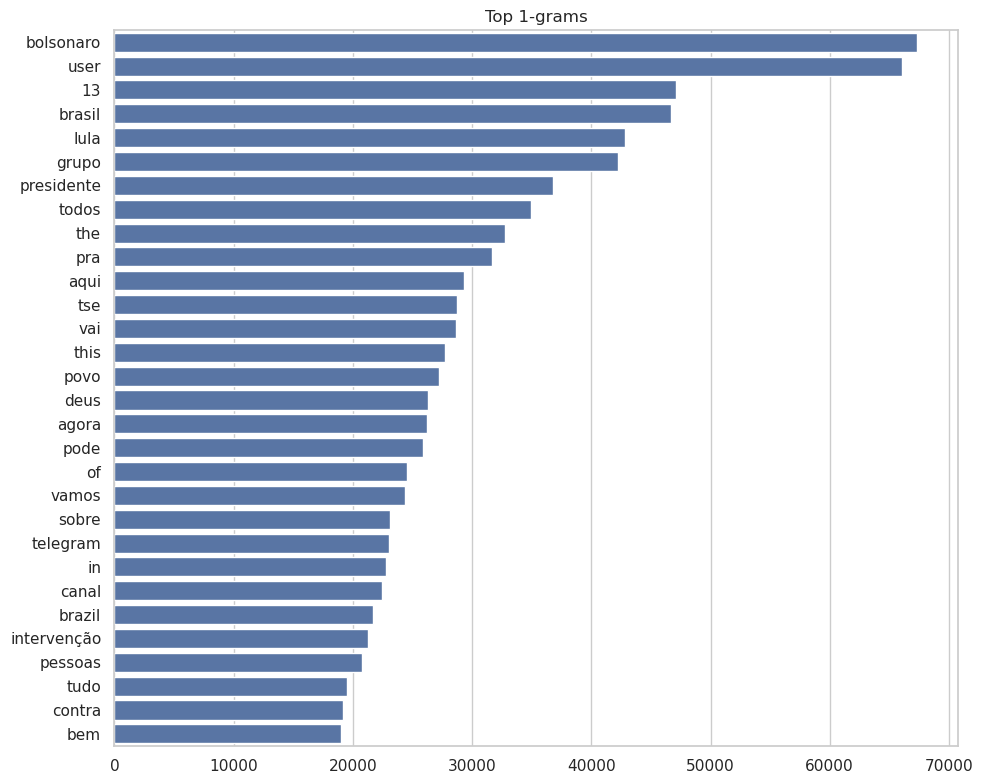

In [110]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_30_1gram,
    x='total',
    y='ngram',
)

plt.title('Top 1-grams')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()

plt.show()

#### Bigramas

In [111]:
query = f"""
WITH tokens AS (
    SELECT word
    {base_query}
),
ngrams AS (
    SELECT
        word || ' ' || lead(word, 1) OVER () as two_gram
    FROM tokens
)
SELECT
    two_gram as "2gram",
    count(*) as count
FROM ngrams
WHERE two_gram NOT LIKE '% % %'
GROUP BY two_gram
ORDER BY count DESC
LIMIT 30;
"""
top_2grams = conn.execute(query).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

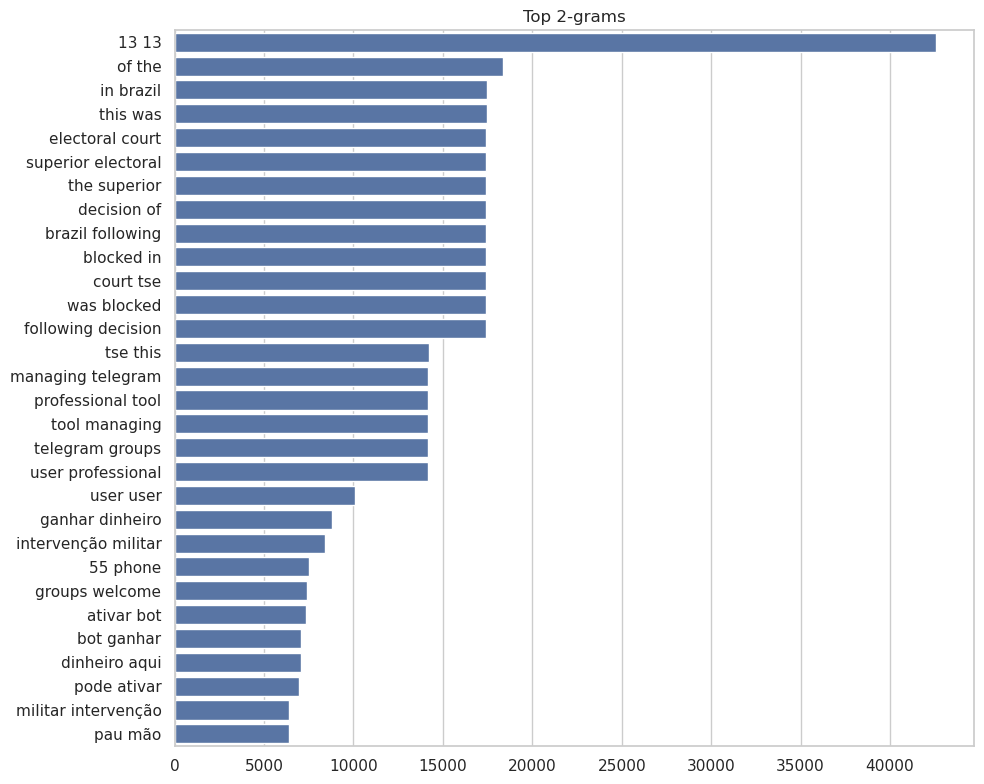

In [112]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_2grams,
    x='count',
    y='2gram',
)

plt.title('Top 2-grams')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()

plt.show()

#### Trigramas

In [113]:
query = f"""
WITH tokens AS (
    SELECT word
    {base_query}
),
ngrams AS (
    SELECT
        word || ' ' || lead(word, 1) OVER () || ' ' || lead(word, 2) OVER () AS three_gram
    FROM tokens
)
SELECT
    three_gram AS "3gram",
    count(*) AS count
FROM ngrams
WHERE three_gram NOT LIKE '% % % %'
GROUP BY three_gram
ORDER BY count DESC
LIMIT 30;
"""
top_3grams = conn.execute(query).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

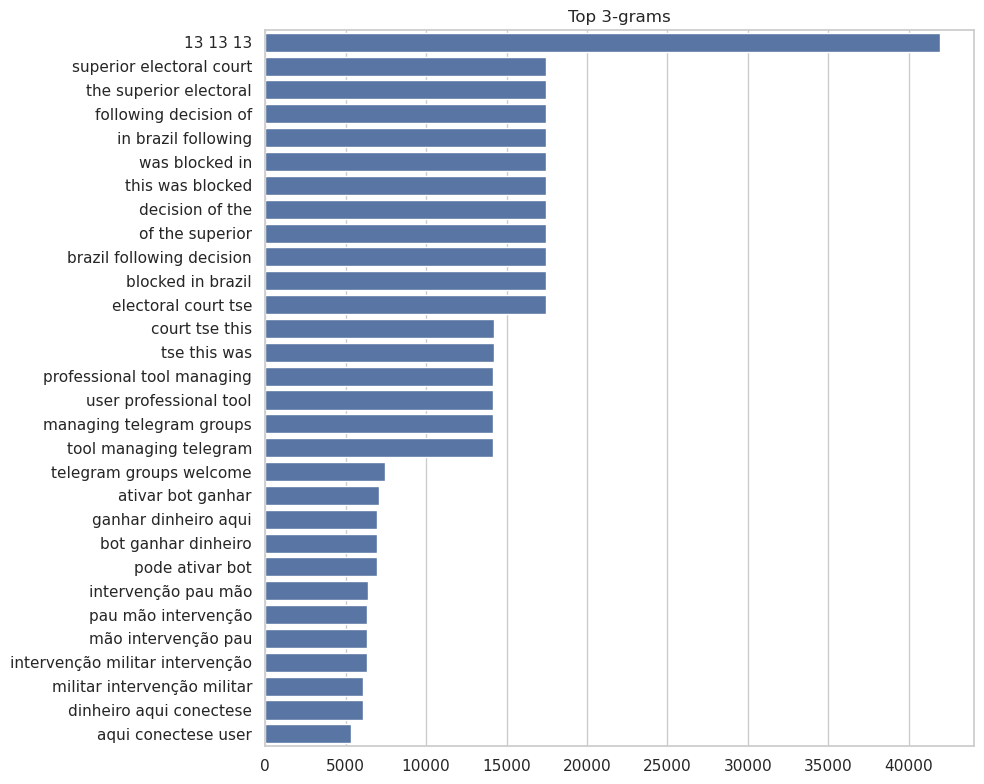

In [114]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_3grams,
    x='count',
    y='3gram',
)

plt.title('Top 3-grams')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()

plt.show()

### 21. As 30 mensagens mais positivas (distintas)

In [115]:
top_positive_messages = conn.execute("""
SELECT DISTINCT text_content_anonymous as message, score_sentiment
FROM messages
WHERE message IS NOT NULL
  AND message != ''
  AND score_sentiment IS NOT NULL AND score_sentiment >= 0.05
ORDER BY score_sentiment DESC
LIMIT 30;
""").df()
top_positive_messages

message  score_sentiment
0   Shemoneh Esreh ‚Äì Amid√° ‚Äì A Grande Ora√ß√£o\n\n ,...           0.9992
1   Pensa direita, n√£o √© correto compartilhar um v...           0.9990
2   MENTIROSA!!!\n\n\nPensa direita, n√£o √© correto...           0.9990
3   ◊ë◊ï◊†◊î ◊ô◊®◊ï◊©◊ú◊ô◊ù,¬†Bo'ne Yetrushalayim¬†- Ben√ß√£o da ...           0.9989
4   Os Sete Samurais \n \nQuando falamos sobre For...           0.9988
5   MANIFESTO √Ä NA√á√ÉO BRASILEIRA\n\nEM DEFESA DO B...           0.9987
6   BOM DIA A TODOS. ENTENDO QUE ESTAMOS VIVENDO D...           0.9986
7   Ol√° ,\n\nUM AMIGO ME PERGUNTOU EM QUEM EU VOTE...           0.9986
8   Uma forma bem legal\nPara quem ainda n√£o sabe ...           0.9985
9   ¬†\nA Viva Esperan√ßa\n\nDepois das sauda√ß√µes in...           0.9985
10  VOC√ä USA A SUA SABEDORIA ESPIRITUAL?\n\nA pr√°t...           0.9984
11  ‚ÄúPaz!‚Äù\nObrigada amados meus, por mais esta An...           0.9984
12  Yom Ha-Shishi (O SEXTO DIA)?\n\nE agora, sem m...           0.9984
13  Salmo 136\n\nRendei gra√ßas ao Eterno porque el...           0.9983
14  *Cincoin community!* Junte-se ao futuro que ho...           0.9983
15  Sobre Fxcapitalgrowth\n  FCAPITAGRWTH.COM √© de...           0.9981
16  Louve a Deus em Todos os Momentos\n\n\n\nImagi...           0.9978
17  PLANOS INICIAIS\n\n¬† SAQUES DE LUCROS S√ÉO DENT...           0.9978
18  A gente come feij√£o puro feij√£o puro feij√£o pu...           0.9978
19  üçû ORANDO A PALAVRA DIARIAMENTEüç∑\n\nDevocional ...           0.9978
20  ‚ö†Ô∏èüÜôAS MARCAS DE UMA F√â VITORIOSA\n\nEst√° escri...           0.9978
21  Deus √© bom o tempo todo\n\nCom que frequ√™ncia ...           0.9978
22  2 Cr√¥nicas 6\nSalom√£o fala ao povo\n6 Ent√£o Sa...           0.9977
23  Vamos ver um texto aqui?\n\nQuero provar pra v...           0.9976
24  As cinco  virgens prudentes que receberam as c...           0.9976
25  GOSTAR?\n\nOl√°,\nUm amigo perguntou-me: \nEm q...           0.9975
26  AS MESMAS COISAS SUCEDEM AOS JUSTOS  E INJUSTO...           0.9975
27  Ao Criador,\n\nCriador de todas as Possibilida...           0.9975
28  Pois bem, os disc√≠pulos ficam a noite toda ten...           0.9974
29  E se eu lhe disser que a democracia uma fraude...           0.9974

### 22. As 30 mensagens mais negativsas (distintas)

In [116]:
top_negative_messages = conn.execute("""
SELECT DISTINCT text_content_anonymous, score_sentiment
FROM messages
WHERE text_content_anonymous IS NOT NULL
  AND text_content_anonymous != ''
  AND score_sentiment IS NOT NULL AND score_sentiment <= 0.05
ORDER BY score_sentiment ASC
LIMIT 30;
""").df()
top_negative_messages

text_content_anonymous  score_sentiment
0   CAPIT√ÉOZINHO DE MERDA üí©\nCAPIT√ÉOZINHO DE MERDA...          -1.0000
1   Gente, a Zambelli nos abandonou! Traiu a nossa...          -0.9999
2   Interven√ß√£o √© meu pau na tua m√£o\nInterven√ß√£o ...          -0.9999
3   E n√≥s aqui nos sacrificando, aguentando sol, c...          -0.9999
4   Interven√ß√£o √© meu pau na tua m√£o\nInterven√ß√£o ...          -0.9999
5   ai ta na rua da um joinha üëçQuem ai ta na rua d...          -0.9999
6   ME C√ö NO PAU DO BOLSONARO \nME C√ö NO PAU DO BO...          -0.9999
7   a rua da um joinha üëçQuem ai ta na rua da um jo...          -0.9998
8   ai ta na rua da um joinha üëçQuem ai ta na rua d...          -0.9998
9   a rua da um joinha üëçQuem ai ta na rua da um jo...          -0.9998
10  ha üëçQuem ai ta na rua da um joinha üëçQuem ai ta...          -0.9998
11  inha üëçQuem ai ta na rua da um joinha üëçQuem ai ...          -0.9998
12  na rua da um joinha üëçQuem ai ta na rua da um j...          -0.9998
13  Quem ai ta na rua da um joinha üëçQuem ai ta na ...          -0.9998
14  a rua da um joinha üëçQuem ai ta na rua da um jo...          -0.9998
15  Sobre a morte como pol√≠tica global e a necessi...          -0.9998
16  na rua da um joinha üëçQuem ai ta na rua da um j...          -0.9998
17  a na rua da um joinha üëçQuem ai ta na rua da um...          -0.9998
18  ta na rua da um joinha üëçQuem ai ta na rua da u...          -0.9998
19  nha üëçQuem ai ta na rua da um joinha üëçQuem ai t...          -0.9998
20  OS COVARDES E ANTI PATRIOTAS BOLSONARISTAS\n\n...          -0.9997
21  OS COVARDES E ANTI PATRIOTAS BOLSONARISTAS\n\n...          -0.9997
22  FRAUDE FRAUDE FRAUDE FRAUDE FRAUDE FRAUDE FRAU...          -0.9996
23  Precisamos nos unir imediatamente, todos os ca...          -0.9996
24  EU PAU √ì ü´¥ü´¥ü´¥ü´¥ü´¥ü´¥üáßüá∑üáßüá∑üáßüá∑üáßüá∑üáßüá∑üáßüá∑üáßüá∑ATEN√á√ÉO !!!!!!! üö®...          -0.9994
25  O capit√£o j√° jogou a toalha. Acordem.\nChega d...          -0.9994
26  VOU FAZER MELHOR...,VOU TE DAR APNAS 100 MOTIV...          -0.9993
27  *Leandro Ruschel:*\n\nO curioso caso do presid...          -0.9993
28  INTERVEN√á√ÉO √â MEU PAU NA TUA M√ÉO!!\n\nINTERVEN...          -0.9992
29  üí•‚ö°Ô∏èüí•‚ö°Ô∏èüí•‚ö°Ô∏èüí•‚ö°Ô∏èüí•‚ö°Ô∏èüí•‚ö°Ô∏èüí•‚ö°Ô∏èüí• COMPARE E REFLITA.........          -0.9992

### 23. O usu√°rio mais otimista

In [117]:
top_positive_user = conn.execute("""
SELECT
    id_member_anonymous,
    AVG(score_sentiment) AS avg_sentiment,
    COUNT(*) AS total_messages
FROM messages
WHERE score_sentiment IS NOT NULL
  AND id_member_anonymous IS NOT NULL
GROUP BY id_member_anonymous
ORDER BY avg_sentiment DESC
LIMIT 1;
""").df()
top_positive_user

id_member_anonymous  avg_sentiment  total_messages
0  5d0e50d6d2183bf16ec637ed24131870         0.9967               1

In [118]:
top_positive_user_10 = conn.execute("""
SELECT
    id_member_anonymous,
    AVG(score_sentiment) AS avg_sentiment,
    COUNT(*) AS total_messages
FROM messages
WHERE score_sentiment IS NOT NULL
  AND id_member_anonymous IS NOT NULL
GROUP BY id_member_anonymous
HAVING COUNT(*) >= 10
ORDER BY avg_sentiment DESC
LIMIT 1;
""").df()
top_positive_user_10

id_member_anonymous  avg_sentiment  total_messages
0  bab79a5f7c599d5b5b9155d5d3d8b570           0.92              25

### 24. O usu√°rio mais pessimista

In [119]:
top_negative_user = conn.execute("""
SELECT
    id_member_anonymous,
    AVG(score_sentiment) AS avg_sentiment,
    COUNT(*) AS total_messages
FROM messages
WHERE score_sentiment IS NOT NULL
  AND id_member_anonymous IS NOT NULL
GROUP BY id_member_anonymous
ORDER BY avg_sentiment ASC
LIMIT 1;
""").df()
top_negative_user

id_member_anonymous  avg_sentiment  total_messages
0  243a43d802953032e1ea9a363546c3b8        -0.9992               1

In [120]:
top_negative_user_10 = conn.execute("""
SELECT
    id_member_anonymous,
    AVG(score_sentiment) AS avg_sentiment,
    COUNT(*) AS total_messages
FROM messages
WHERE score_sentiment IS NOT NULL
  AND id_member_anonymous IS NOT NULL
GROUP BY id_member_anonymous
HAVING COUNT(*) >= 10
ORDER BY avg_sentiment ASC
LIMIT 1;
""").df()
top_negative_user_10

id_member_anonymous  avg_sentiment  total_messages
0  525aacc8e246df1885c5d1ee2feec506       -0.93254              15

### 25. As 30 maiores mensagens

In [121]:
top_longest_messages = conn.execute("""
SELECT
    DISTINCT text_content_anonymous
    id_member_anonymous,
    LENGTH(text_content_anonymous) AS message_length,
FROM messages
WHERE text_content_anonymous IS NOT NULL
  AND text_content_anonymous != ''
ORDER BY message_length DESC
LIMIT 30;
""").df()
top_longest_messages

id_member_anonymous  message_length
0   Trecho do livro ‚ÄúPr√°tica da Conspira√ß√£o A Agen...            4096
1   1: Sans√£o foi a Gaza, e viu ali uma prostituta...            4096
2   [Encaminhado de FYI-Brasil (S√∫)]\nüö®ELEI√á√ïES DE...            4096
3   COMO O SOCIALISMO DESTRUIU A VENEZUELA EM POUC...            4096
4   1: Aconteceu tamb√©m naqueles dias, quando n√£o ...            4096
5   PROPOSTAS DE BOLSONARO PARA 2023 - POSTADAS AG...            4096
6   1: Naqueles dias n√£o havia melech em Yisra-EL;...            4096
7   ROIA‚ôò ‚ôûHERON‚òÖÔøΩCAVALO‚òÖ¬ßÔøΩDE‚òÖ¬ßÔøΩ¬ßTROIA‚ôò ‚ôûHERON‚òÖÔøΩCA...            4096
8   [USER]‚ö†Ô∏è‚ö†Ô∏èDIVULGEM O M√ÅXIMO POSS√çVEL \n\nVAMOS...            4095
9   1 ‚Äì A Estrat√©gia da Distra√ß√£o.\n\nO elemento p...            4095
10  Sobre a morte como pol√≠tica global e a necessi...            4095
11  Vamos l√°... \nPra n√£o perder o costume, mais u...            4095
12  PERNAMBUCO ‚öΩÔ∏èüéÑ Prefeitura do Recife abre inscr...            4094
13  üî¥ ALERTA TOTAL üÜòÔ∏è üí£ YAHU E YAHUSHUA S√£o Merda ...            4094
14  ‚ú≥Ô∏è‚ùáÔ∏è‚öúÔ∏è‚öì‚öúÔ∏è‚ùáÔ∏è‚ú≥Ô∏è\n\nELEI√á√ïES 2022- DIVULGADO O ES...            4093
15  Aten√ß√£o! Aten√ß√£o! Aten√ß√£o! O Administrador do ...            4093
16  Apenas dois estrangeiros puderam subir ao pala...            4093
17  "Baumer, Lorenzo",,"033, 033 (l)","www.lorenzb...            4093
18  Amados!\nOs olhos do mundo estavam voltados pa...            4093
19  Aten√ß√£o! Aten√ß√£o! Aten√ß√£o! O Administrador do ...            4093
20  ‚ô®Ô∏è ESC√ÇNDALO ‚ô®Ô∏è\n\nüí£ELEI√á√ïES 2022üí£ \n\nDIVULGA...            4093
21  Lula e a VARIG‚Äù\nSenhoras e senhores!!!\nVejam...            4093
22  Antonieta de Barros foi excepcional. Est√° entr...            4093
23  SUGEST√ÉO DE PAUTA \n\n*Festival Canoa Blues 20...            4093
24  PETISTAS COMENDO MULHER D QUEM T√Å NOS BLOQUEIO...            4092
25  ‚îª‚î≥|‚Äï-‚à©\n‚î≥‚îª|„ÄÄ„ÄÄ„ÉΩ.   Filhos e\n‚îª‚î≥|„ÄÄ‚óè¬†¬† |   Pais e...            4092
26  ME C√ö NO PAU DO BOLSONARO \nME C√ö NO PAU DO BO...            4092
27  Interven√ß√£o √© meu pau na tua m√£o\nInterven√ß√£o ...            4091
28  Resum√£o do governo petista: \n \nEu sei! \n \n...            4091
29  E AGORA XAND√ÉO ?\n Voc√™ vai mandar prender o g...            4091

### 26. As 30 menores mensagens

In [122]:
top_shortest_messages = conn.execute("""
SELECT
    DISTINCT text_content_anonymous,
    id_member_anonymous,
    LENGTH(text_content_anonymous) AS message_length,
FROM messages
WHERE text_content_anonymous IS NOT NULL
  AND text_content_anonymous != ''
ORDER BY message_length ASC
LIMIT 30;
""").df()
top_shortest_messages

text_content_anonymous               id_member_anonymous  message_length
0            Sou do R G S                              None              12
1            *S I  N A L*                              None              12
2          A√≠ a√≠ a√≠ ui ui                              None              14
3         A bolsa fez o L                              None              15
4     üå©\n\nüáßüá∑\n\nPois √© üôà  04d25416106623950c5b8785235ef1f9              15
5         Foto de A √ç D A                              None              15
6         √â esse o site ?  a2921b315ad9351b6c0eeedb8c200fbc              15
7        Foto de üéÄ VIVI üéÄ                              None              16
8        V√≠deo de A √ç D A                              None              16
9        V√≠deo de üëä üí™ üëçü§úü§õ  f3b5de563526482d7779a3a81df2540e              16
10       √â o fim do mundo  52457463d47ef753173a8717f02a21b3              16
11       I have sent it ,                              None              16
12       O que √© isso üò°üò°üò°                              None              16
13       Meu voto √© 22 üáßüá∑                              None              16
14      Eu j√° fui vote 22                              None              17
15      faz o L de ladr√£o                              None              17
16      E n√£o para por a√≠                              None              17
17  üå©\n\nüáßüá∑\n\nL√° em 2021                              None              17
18      Faz o L que passa  e8fd8fee8c39342d37993775da7756d5              17
19      Faz o L de Ladr√£o  c70e9602f2ba26ed250f1e1b4ef75874              17
20     O meu voto √© 22 üáßüá∑                              None              18
21     Nosso voto √© 22 !!                              None              18
22     Bom dia a Todos !!  f0ef185152c7903f6466233a9676ac73              18
23     A UM PASSO DE GALO                              None              18
24     22 de cabo a rabo.                              None              18
25     Foto de Om Sai Ram  9e6869d9cb5cf3db1e50510c3f2a48de              18
26     A UM PASSO DE GALO  8bbd902ea88b4a657af914fdc7d34286              18
27     Bom dia povo de f√©                              None              18
28     Foto de MVCA & RCS                              None              18
29     Carol Dias √© 22 üáßüá∑  e8fd8fee8c39342d37993775da7756d5              18

### 27. O dia em que foi publicado a maior quantidade de mensagens

In [123]:
day_with_most_messages = conn.execute("""
SELECT
    CAST(date_message AS DATE) AS message_day,
    COUNT(*) AS total_messages
FROM messages
WHERE date_message IS NOT NULL
GROUP BY message_day
ORDER BY total_messages DESC
LIMIT 1;
""").df()
day_with_most_messages

message_day  total_messages
0  2022-11-01           18474

In [124]:
top10_days_with_most_messages = conn.execute("""
SELECT
    CAST(date_message AS DATE) AS message_day,
    COUNT(*) AS total_messages
FROM messages
WHERE date_message IS NOT NULL
GROUP BY message_day
ORDER BY total_messages DESC
LIMIT 10;
""").df()
top10_days_with_most_messages

message_day  total_messages
0  2022-11-01           18474
1  2022-10-31           15271
2  2022-10-03           13003
3  2022-10-05           12641
4  2022-11-02           12606
5  2022-10-02           11309
6  2022-10-04           10424
7  2022-10-30            9518
8  2022-10-06            8611
9  2022-10-12            8509

### 28. As mensagens que possuem as palavras "Fac√ß√£o" e "Criminosa"

In [125]:
messages_with_faction_and_criminal = conn.execute("""
SELECT
    id_message,
    id_member_anonymous,
    text_content_anonymous
FROM messages
WHERE text_content_anonymous IS NOT NULL
  AND LOWER(text_content_anonymous) LIKE '%fac√ß√£o%'
  AND LOWER(text_content_anonymous) LIKE '%criminosa%'
""").df()
messages_with_faction_and_criminal

id_message               id_member_anonymous  \
0         19285                              None   
1        105417  530db5d239f941ef44aae189f20b44a2   
2       1090985  530db5d239f941ef44aae189f20b44a2   
3       1097866                              None   
4       1098563                              None   
..          ...                               ...   
133     1210244                              None   
134      973541                              None   
135       19115                              None   
136       53201  76b7d0b3c652aaefb984081e503af0eb   
137     1184303                              None   

                                text_content_anonymous  
0    Pensem!!!!!!'Se Houve fraude  ,Nada foi feito ...  
1    Se depois de ler esse resumo do Plano do PT, v...  
2    Se depois de ler esse resumo do Plano do PT, v...  
3    √â  exatamente isso que a fac√ß√£o criminosa CHAM...  
4    Esperar o que dessa elei√ß√£o  com bandidos alia...  
..                                                 ...  
133  üò£ü§Øü§ê Alexandre de Moraes (Secret√°rio-Geral do P...  
134  üò£ü§Øü§ê Alexandre de Moraes (Secret√°rio-Geral do P...  
135  üò£ü§Øü§ê Alexandre de Moraes (Secret√°rio-Geral do P...  
136  Agress√µes covardes √© termos uma fac√ß√£o crimino...  
137  Justi√ßa solta advogadas do PCC acusadas de par...  

[138 rows x 3 columns]

### 29. Quantidade de mensagens por dia e hora

In [129]:
messages_by_day_hour = conn.execute("""
SELECT 
    date_trunc('hour', CAST(date_message AS TIMESTAMP)) AS date_hour,
    COUNT(*) AS count
FROM df_clean
GROUP BY date_hour
ORDER BY date_hour;
""").df()

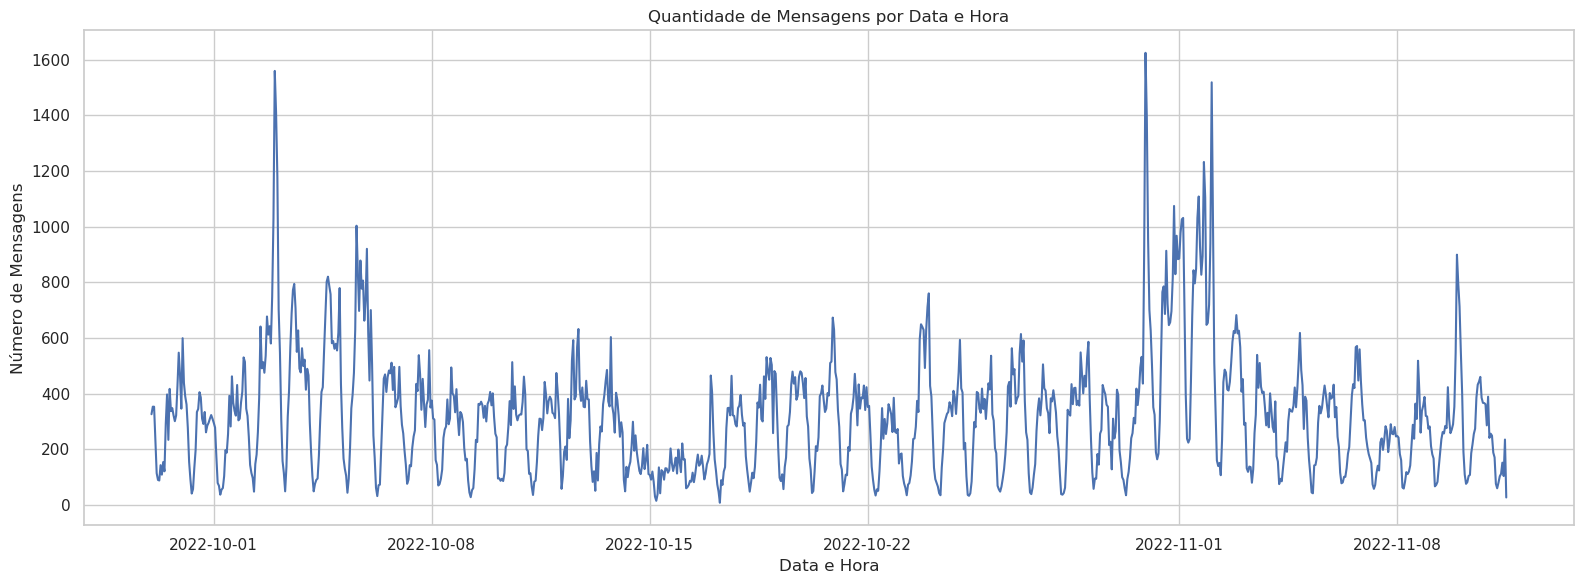

In [130]:
plt.figure(figsize=(16, 6))
plt.plot(messages_by_day_hour['date_hour'], messages_by_day_hour['count'])

plt.title('Quantidade de Mensagens por Data e Hora')
plt.xlabel('Data e Hora')
plt.ylabel('N√∫mero de Mensagens')
plt.tight_layout()
plt.grid(True)
plt.show()

### 30. Quantidade de mensagens por hora

In [131]:
messages_by_hour = conn.execute("""
SELECT
  EXTRACT(
    HOUR
    FROM
      CAST(date_message AS TIMESTAMP)
  ) AS hour_of_day,
  COUNT(*) AS total_messages
FROM
  messages
WHERE
  date_message IS NOT NULL
GROUP BY
  hour_of_day
ORDER BY
  hour_of_day;
""").df()

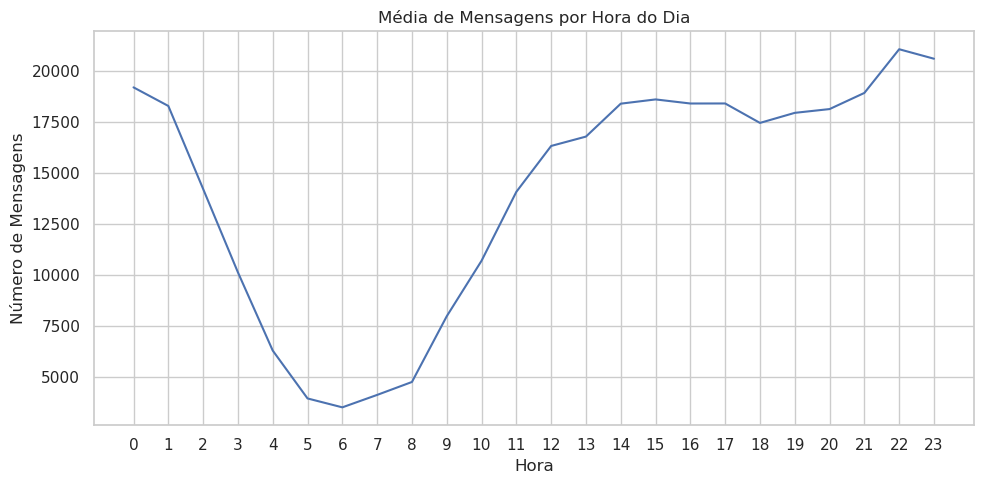

In [133]:
plt.figure(figsize=(10, 5))
plt.plot(messages_by_hour['hour_of_day'], messages_by_hour['total_messages'])

plt.title('M√©dia de Mensagens por Hora do Dia')
plt.xlabel('Hora')
plt.ylabel('N√∫mero de Mensagens')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

### 31. A nuvem de palavras referente √†s mensagens de texto (ap√≥s a remo√ß√£o de stopwords)

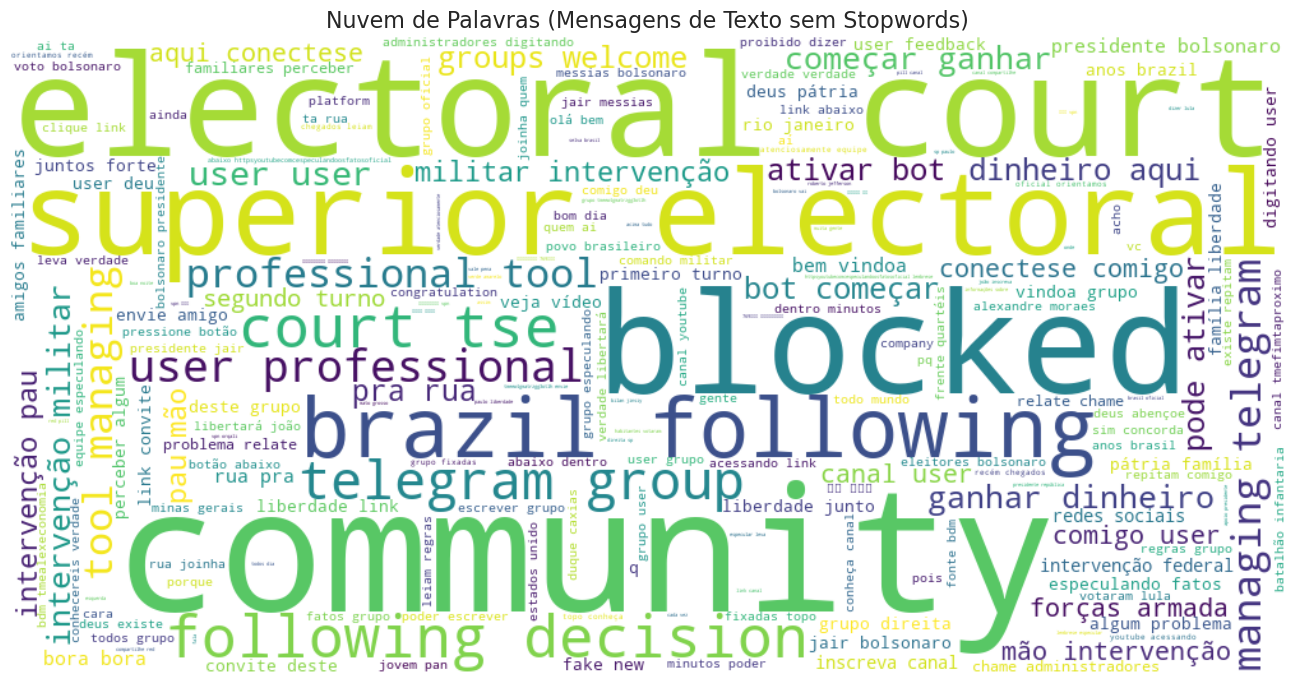

In [134]:
text = ' '.join(df_clean['text_no_stopwords'].dropna().astype(str)).lower()

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    max_words=200
).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras (Mensagens de Texto sem Stopwords)', fontsize=16)
plt.tight_layout()
plt.show()

### 32. A rede interativa das palavras referentes √†s mensagens de texto (ap√≥s a remo√ß√£o de stopwords)

In [136]:
# Etapa 1: Extrair palavras mais frequentes
texts = df_clean['text_no_stopwords'].dropna().astype(str).tolist()
all_words = [word for text in texts for word in text.lower().split()]
top_words = set([word for word, _ in Counter(all_words).most_common(100)])

# Etapa 2: Contar coocorr√™ncias entre as palavras mais frequentes
filtered_pairs = Counter()
for text in texts:
    words = set(text.split()) & top_words
    for pair in combinations(sorted(words), 2):
        filtered_pairs[pair] += 1

# Etapa 3: Filtrar conex√µes fortes (frequ√™ncia >= 1000)
filtered_pairs = {pair: count for pair, count in filtered_pairs.items() if count >= 1000}

In [137]:
len(filtered_pairs)

381

In [141]:
# Etapa 4: Criar e exibir a rede com pyvis
net = Network(notebook=True, height='750px', width='100%', cdn_resources='remote')
net.repulsion()

# Adicionar n√≥s e arestas
nodes = set()
for (word1, word2), weight in filtered_pairs.items():
    nodes.update([word1, word2])
    net.add_node(word1, label=word1)
    net.add_node(word2, label=word2)
    net.add_edge(word1, word2, value=weight)

net.set_options("""
{
  "physics": {
    "stabilization": {
      "enabled": true,
      "iterations": 1000,
      "updateInterval": 1000
    }
  }
}
""")

# Etapa 5: Exibir a rede
net.show("word_cooccurrence.html")

word_cooccurrence.html


### 33. Propor√ß√£o de mensagens com e sem URL

In [146]:
quant_messages_with_urls = conn.execute("""
SELECT
  COUNT(CASE WHEN text_content_anonymous IS NOT NULL AND has_media_url = False THEN 1 END) AS only_text,
  COUNT(CASE WHEN has_media_url = True AND text_content_anonymous IS NOT NULL THEN 1 END) AS with_media
FROM messages
""").df()

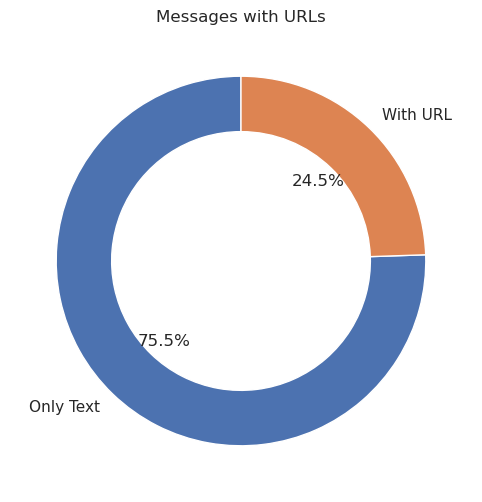

In [147]:
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    quant_messages_with_urls.iloc[0].values,
    labels=['Only Text', 'With URL'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)

ax.set(aspect="equal", title='Messages with URLs')

plt.show()

### 34. Propor√ß√£o de desinforma√ß√£o

In [157]:
proportion_misinformation = conn.execute("""
SELECT
  COUNT(CASE WHEN misinformation_category IS NOT NULL AND misinformation_category = 'Misinformation' THEN 1 END) AS Misinformation,
  COUNT(CASE WHEN misinformation_category IS NOT NULL AND misinformation_category = 'Neutral' THEN 1 END) AS Neutral,
  COUNT(CASE WHEN misinformation_category IS NOT NULL AND misinformation_category = 'Non-misinformation' THEN 1 END) AS Non,
FROM messages
""").df()

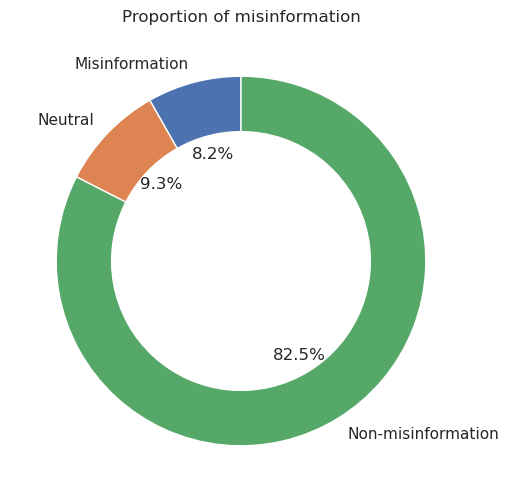

In [152]:
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    proportion_misinformation.iloc[0].values,
    labels=['Misinformation', 'Neutral', 'Non-misinformation'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)

ax.set(aspect="equal", title='Proportion of misinformation')

plt.show()

### 35. Propor√ß√£o de mensagens contendo m√≠dia e desinforma√ß√£o

In [156]:
misinformation_with_media = conn.execute("""
SELECT
  COUNT(CASE WHEN misinformation_category IS NOT NULL AND misinformation_category = 'Misinformation' AND has_media is true THEN 1 END) AS media,
  COUNT(CASE WHEN misinformation_category IS NOT NULL AND misinformation_category = 'Misinformation' AND has_media is false THEN 1 END) AS notMedia
FROM messages
""").df()

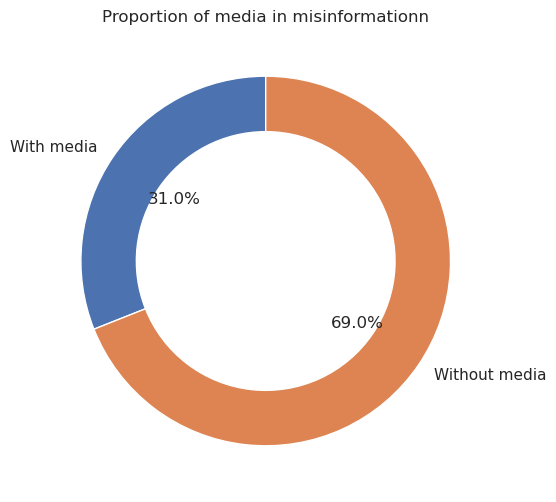

In [153]:
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    misinformation_with_media.iloc[0].values,
    labels=['With media', 'Without media'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)

ax.set(aspect="equal", title='Proportion of media in misinformationn')

plt.show()

### 36. Distribui√ß√£o de mensagens por score de desinforma√ß√£o

/tmp/ipykernel_170/1579592887.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



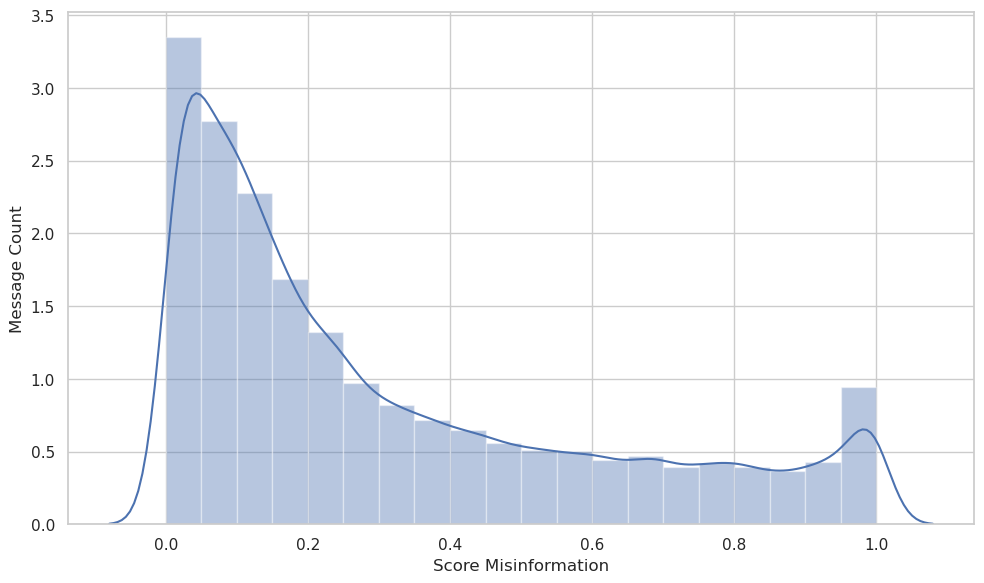

In [154]:
plt.figure(figsize=(10, 6))
sns.distplot(df_clean['score_misinformation'], bins=k_sm)

plt.xlabel('Score Misinformation')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()

### 37. Propor√ß√£o de sentimentos

In [158]:
proportion_sentiments = conn.execute("""
SELECT
  COUNT(CASE WHEN sentiment IS NOT NULL AND sentiment = 'Positive' THEN 1 END) AS positive,
  COUNT(CASE WHEN sentiment IS NOT NULL AND sentiment = 'Neutral' THEN 1 END) AS neutral,
  COUNT(CASE WHEN sentiment IS NOT NULL AND sentiment = 'Negative' THEN 1 END) AS negative,
FROM messages
""").df()

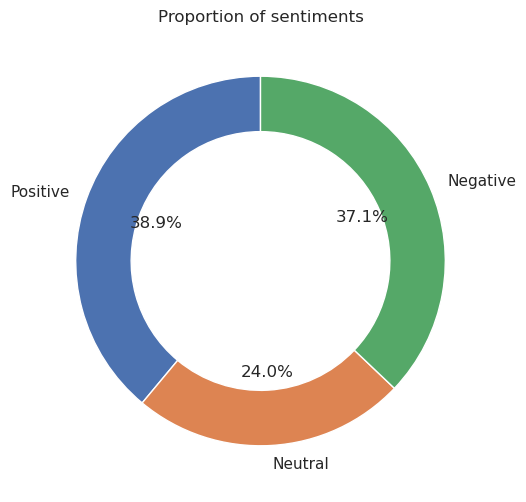

In [159]:
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    proportion_sentiments.iloc[0].values,
    labels=['Positive', 'Neutral', 'Negative'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)

ax.set(aspect="equal", title='Proportion of sentiments')

plt.show()

### 38. Distribui√ß√£o de mensagens por score de sentimento

/tmp/ipykernel_170/928112708.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



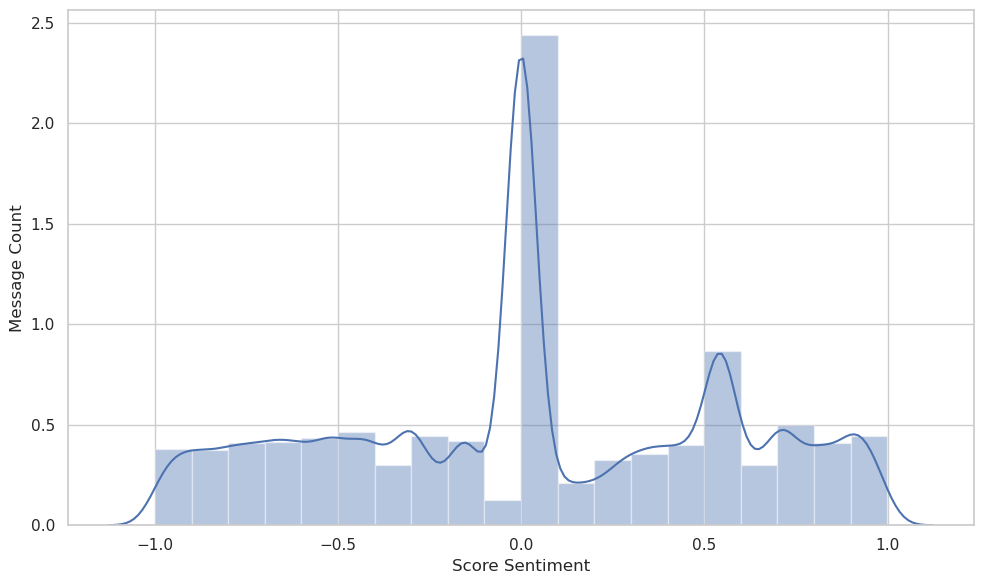

In [160]:
plt.figure(figsize=(10, 6))
sns.distplot(df_clean['score_sentiment'], bins=k_ss)

plt.xlabel('Score Sentiment')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()

### 39. Propor√ß√£o entre mensagens virais e n√£o virais

In [161]:
proportion_viral = conn.execute("""
SELECT
  COUNT(CASE WHEN viral IS NOT NULL AND viral = 'True' THEN 1 END) AS positive,
  COUNT(CASE WHEN viral IS NOT NULL AND viral = 'False' THEN 1 END) AS neutral
FROM messages
""").df()

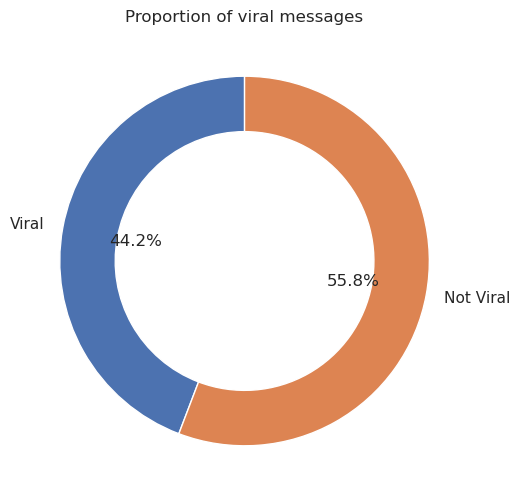

In [162]:
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    proportion_viral.iloc[0].values,
    labels=['Viral', 'Not Viral'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)

ax.set(aspect="equal", title='Proportion of viral messages')

plt.show()

### 40. Algo que voc√™ julga importante que ainda n√£o foi solicitado

An√°lise da Evolu√ß√£o Temporal da Atividade de Usu√°rios Mais Ativos

In [173]:
activity_df = conn.execute("""
    SELECT 
        DATE(CAST(date_message AS TIMESTAMP)) AS message_date,
        id_member_anonymous,
        COUNT(*) AS daily_messages
    FROM df_clean
    WHERE id_member_anonymous IN (
        SELECT id_member_anonymous
        FROM messages
        GROUP BY id_member_anonymous
        ORDER BY COUNT(*) DESC
        LIMIT 10
    )
    GROUP BY message_date, id_member_anonymous
    ORDER BY message_date, id_member_anonymous;
""").df()

<Figure size 1800x600 with 0 Axes>

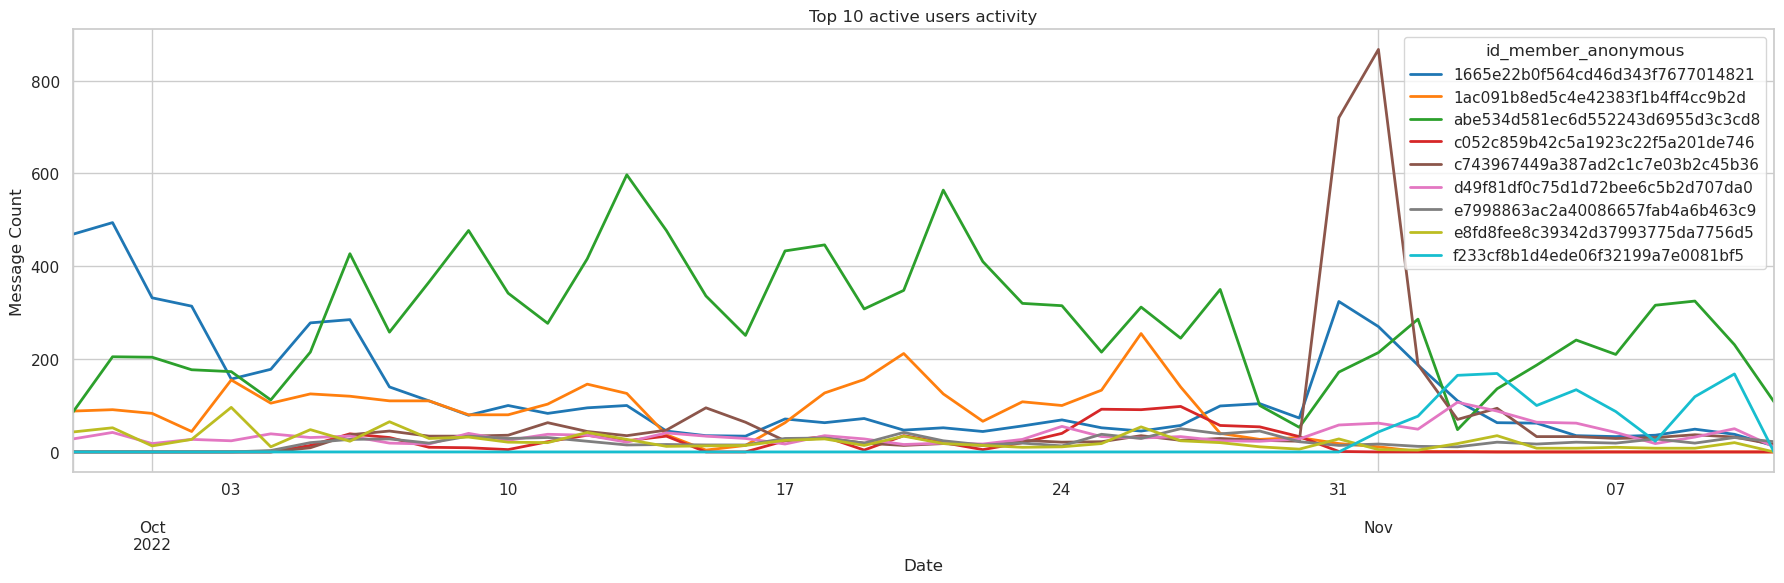

In [174]:
activity_pivot = activity_df.pivot(index="message_date", columns="id_member_anonymous", values="daily_messages").fillna(0)

plt.figure(figsize=(18, 6))
activity_pivot.plot(figsize=(18, 6), cmap="tab10", linewidth=2)

plt.title("Top 10 active users activity")
plt.xlabel("Date")
plt.ylabel("Message Count")
plt.grid(True)
plt.tight_layout()
plt.show()